**PROJECT INFORMATION**

### Build Unsupervised Learning Models using Python: Clustering

#### Group -
#### Anjala - 055005
#### Dimple Batra - 055009

#### DESCRIPTION OF DATA
### Data Information

- **Data Size:** 2.56 MB  
- **Data Type:** Panel  

### Data Dimension  
- **No. of Variables:** 16  
- **No. of Observations:** 15,000  

---

## Data Variable Type

### Numeric  
- **Integer:** Quantity, Customs_Code, Invoice_Number  
- **Decimal:** Value, Weight  

### Non-Numeric  
Transaction_ID, Customs_Code, Invoice_Number, Product, Supplier, Cu,  Shipping_Method, Countrysomer, Date, Port  

---

## Data Variable Category - I  

### Categorical  
- **Nominal:** Import_Export, Category, Shipping_Method, Payment_Terms, Country  
- **Ordinal:**  

### Non-Categorical  
Quantity, Value, Weight
---

## Data Variable Category - II  

- **Transaction_ID:** Unique identifier for each trade transaction.  
- **Country:** Country of origin or destination for the trade.  
- **Product:** Product being traded.  
- **Import_Export:** Indicates whether the transaction is an import or export.  
- **Quantity:** Amount of the product traded.  
- **Value:** Monetary value of the product in USD.  
- **Date:** Date of the transaction.  
- **Category:** Category of the product (e.g., Electronics, Clothing, Machinery).  
- **Port:** Port of entry or departure.  
- **Customs_Code:** Customs or HS code for product classification.  
- **Weight:** Weight of the product in kilograms.  
- **Shipping_Method:** Method used for shipping (e.g., Air, Sea, Land).  
- **Supplier:** Name of the supplier or manufacturer.  
- **Customer:** Name of the customer or recipient.  
- **Invoice_Number:** Unique invoice number for the transaction.  
- **Payment_Terms:** Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).  

---

## About Dataset  

This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.

### **Project Objectives**
1. **Analyze Trade Patterns**  
   - Identify global trends in international trade, focusing on variations in import and export dynamics across regions and product categories.

2. **Classification and Segmentation**  
   - Develop robust clustering techniques to segment trade transactions based on variables such as quantity, value, and weight.

3. **Predictive Modeling for Trade Forecasting**  
   - Utilize historical data to build machine learning models for accurately predicting future trade volumes and identifying high-growth product categories or regions.

4. **Anomaly Detection for Risk Management**  
   - Implement advanced anomaly detection methods to identify irregularities in trade data, aiding in fraud detection and ensuring regulatory compliance.

5. **Decision Support for Supply Chain Optimization**  
   - Provide actionable insights for optimizing supply chain logistics, including cost reduction strategies, efficient shipment handling, and improving trade cycle performance.

6. **Feature Analysis for Trade Drivers**  
   - Understand how key variables such as quantity, value, weight, payment terms, and shipping methods contribute to the trade lifecycle and influence business decisions.

---

### **Problem Statements**
1. **Effective Classification and Segmentation**  
   - How can clustering algorithms (e.g., hierarchical clustering, K-means) effectively classify trade transactions into meaningful segments to derive actionable insights?

2. **Key Drivers of Trade Variations**  
   - What factors (e.g., product type, region, shipping weight) most significantly drive variations in import/export volumes, and how do these factors differ across countries and categories?

3. **Forecasting Trade Volumes**  
   - Can predictive models like regression or time-series analysis provide accurate forecasts for trade volumes at the country, region, or product level?

4. **Impact of Operational Variables**  
   - What role do payment terms, shipping methods, and logistical constraints play in determining trade efficiency and profitability?

5. **Anomaly and Fraud Detection**  
   - How can inconsistencies in trade data be systematically identified to detect potential errors, fraud, or irregular activities?

6. **Enhancing Decision-Making**  
   - What insights can help decision-makers prioritize shipment handling, optimize inventory management, and plan cost-effective supply chain strategies?


### ANALYSIS OF DATA & REPORT (at the end)
### Data Preprocessing

In [1]:
#Import relevant libraries
import pandas as pd
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
import statsmodels.api as sm
import io
import requests
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau
from scipy.stats import skew, kurtosis, pearsonr, norm
from scipy.stats import chi2_contingency
from scipy import stats

# Google Drive file ID
file_id = "18pqV3IXCGPnyUxDcahtYz-x1m4ndFUrw"

# Construct the Google Drive download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Send the GET request to the file URL
response = requests.get(url)
data = io.StringIO(response.text)
ac05_df = pd.read_csv(data)
ac05_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [2]:
ac05_df = ac05_df.sample(n=5001, random_state=110014)
ac05_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 2396 to 437
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [3]:
#Subset of Non-Categorical Variables
ac05_df_noncat = ac05_df[['Quantity','Value','Weight']]
ac05_df_noncat.head()

Quantity    Value   Weight
2396       8121   337.41  2958.75
7470       9229  3951.92  1936.73
11831      6519  6755.81  3658.23
5322       9432  2174.49  3808.21
2638       6267  9036.98   681.94

In [4]:
# Subset of categorical variables
ac05_df_cat = ac05_df[['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']]
ac05_df_cat.head()

Import_Export     Category Shipping_Method     Payment_Terms
2396         Import    Furniture             Air           Prepaid
7470         Export    Machinery            Land            Net 30
11831        Import    Machinery            Land  Cash on Delivery
5322         Export     Clothing             Air           Prepaid
2638         Export  Electronics            Land            Net 60

In [5]:
import pandas as pd

def missing_data_summary(df):
    """
    Creates a DataFrame summarizing missing data statistics.

    Args:
        df: The input DataFrame.

    Returns:
        A DataFrame with missing data count and percentage for each variable and row.
    """
    # Column-wise summary
    missing_count_col = df.isnull().sum()
    missing_percentage_col = (missing_count_col / len(df)) * 100
    missing_summary_col = pd.DataFrame({
        'Missing Count': missing_count_col,
        'Missing Percentage': missing_percentage_col
    })

    # Row-wise summary
    missing_count_row = df.isnull().sum(axis=1)
    missing_percentage_row = (missing_count_row / len(df.columns)) * 100
    missing_summary_row = pd.DataFrame({
        'Missing Count': missing_count_row,
        'Missing Percentage': missing_percentage_row
    }, index=df.index)  # Use original DataFrame index

    return missing_summary_col, missing_summary_row


def handle_missing_data(df, row_threshold=50, col_threshold=50):
    """
    Handles missing data by dropping rows and columns exceeding the threshold.

    Args:
        df: The input DataFrame.
        row_threshold: Percentage of missing data in rows to tolerate before dropping.
        col_threshold: Percentage of missing data in columns to tolerate before dropping.

    Returns:
        Cleaned DataFrame and counts of dropped rows/columns.
    """
    # Calculate row and column thresholds in terms of counts
    row_thresh_count = len(df.columns) * (1 - row_threshold / 100)
    col_thresh_count = len(df) * (1 - col_threshold / 100)

    # Drop rows and columns based on thresholds
    df_cleaned = df.dropna(thresh=row_thresh_count, axis=0)  # Drop rows
    df_cleaned = df_cleaned.dropna(thresh=col_thresh_count, axis=1)  # Drop columns

    # Calculate dropped rows and columns
    dropped_rows = len(df) - len(df_cleaned)
    dropped_columns = len(df.columns) - len(df_cleaned.columns)

    return df_cleaned, dropped_rows, dropped_columns


# Example usage
# Assume `ac05_df_cat` (categorical subset) and `ac05_df_noncat` (non-categorical subset) are defined

# Categorical missing data summary
ac05_missing_summary_cat_col, ac05_missing_summary_cat_row = missing_data_summary(ac05_df_cat)

# Non-Categorical missing data summary
ac05_missing_summary_noncat_col, ac05_missing_summary_noncat_row = missing_data_summary(ac05_df_noncat)

# Handle missing data for categorical subset
ac05_df_cat_treated, ac05_dropped_rows_cat, ac05_dropped_columns_cat = handle_missing_data(ac05_df_cat)

# Handle missing data for non-categorical subset
ac05_df_noncat_treated, ac05_dropped_rows_noncat, ac05_dropped_columns_noncat = handle_missing_data(ac05_df_noncat)

# Total dropped variables and rows
ac05_total_dropped_variables = ac05_dropped_columns_cat + ac05_dropped_columns_noncat
ac05_total_dropped_rows = ac05_dropped_rows_cat + ac05_dropped_rows_noncat

# Print missing data summaries and dropped counts
print("Categorical Missing Data Summary (Columns):")
print(ac05_missing_summary_cat_col)
print("\nCategorical Missing Data Summary (Rows):")
print(ac05_missing_summary_cat_row)
print("\nNon-Categorical Missing Data Summary (Columns):")
print(ac05_missing_summary_noncat_col)
print("\nNon-Categorical Missing Data Summary (Rows):")
print(ac05_missing_summary_noncat_row)
print(f"\nTotal variables dropped: {ac05_total_dropped_variables}")
print(f"Total rows dropped: {ac05_total_dropped_rows}")


Categorical Missing Data Summary (Columns):
                 Missing Count  Missing Percentage
Import_Export                0                 0.0
Category                     0                 0.0
Shipping_Method              0                 0.0
Payment_Terms                0                 0.0

Categorical Missing Data Summary (Rows):
       Missing Count  Missing Percentage
2396               0                 0.0
7470               0                 0.0
11831              0                 0.0
5322               0                 0.0
2638               0                 0.0
...              ...                 ...
13867              0                 0.0
5096               0                 0.0
5973               0                 0.0
3845               0                 0.0
437                0                 0.0

[5001 rows x 2 columns]

Non-Categorical Missing Data Summary (Columns):
          Missing Count  Missing Percentage
Quantity              0                 0.0
Value

In [6]:
# Create imputers for categorical and non-categorical data
ac05_imputer_cat = SimpleImputer(strategy='most_frequent')  # Mode for categorical
ac05_imputer_noncat = SimpleImputer(strategy='mean')  # Mean for non-categorical

# Fit and transform imputers on the treated datasets
ac05_df_cat_imputed = pd.DataFrame(ac05_imputer_cat.fit_transform(ac05_df_cat_treated),
                                  columns=ac05_df_cat_treated.columns,
                                  index=ac05_df_cat_treated.index)
ac05_df_noncat_imputed = pd.DataFrame(ac05_imputer_noncat.fit_transform(ac05_df_noncat_treated),
                                    columns=ac05_df_noncat_treated.columns,
                                    index=ac05_df_noncat_treated.index)

# Count imputed values
ac05_imputed_count_cat = ac05_df_cat_imputed.isnull().sum().sum() - ac05_df_cat_treated.isnull().sum().sum()
ac05_imputed_count_noncat = ac05_df_noncat_imputed.isnull().sum().sum() - ac05_df_noncat_treated.isnull().sum().sum()

# Print head of imputed datasets
print("Imputed Categorical Dataset:")
print(ac05_df_cat_imputed.head())

print("\nHead of Imputed Non-Categorical Dataset:")
print(ac05_df_noncat_imputed.head())

# Print count of imputed values
print(f"\nNumber of imputed values in categorical dataset: {ac05_imputed_count_cat}")
print(f"Number of imputed values in non-categorical dataset: {ac05_imputed_count_noncat}")

Imputed Categorical Dataset:
      Import_Export     Category Shipping_Method     Payment_Terms
2396         Import    Furniture             Air           Prepaid
7470         Export    Machinery            Land            Net 30
11831        Import    Machinery            Land  Cash on Delivery
5322         Export     Clothing             Air           Prepaid
2638         Export  Electronics            Land            Net 60

Head of Imputed Non-Categorical Dataset:
       Quantity    Value   Weight
2396     8121.0   337.41  2958.75
7470     9229.0  3951.92  1936.73
11831    6519.0  6755.81  3658.23
5322     9432.0  2174.49  3808.21
2638     6267.0  9036.98   681.94

Number of imputed values in categorical dataset: 0
Number of imputed values in non-categorical dataset: 0


In [7]:
# Encoding
# Select categorical columns with text data
ac05_categorical_cols_text = ac05_df_cat_imputed.select_dtypes(include=['object']).columns

# Create OrdinalEncoder
ac05_encoder = OrdinalEncoder()

# Fit and transform encoder on selected columns
ac05_df_cat_encoded = ac05_df_cat_imputed.copy()  # Create a copy to avoid modifying the original
ac05_df_cat_encoded[ac05_categorical_cols_text] = ac05_encoder.fit_transform(ac05_df_cat_imputed[ac05_categorical_cols_text])

# Display encoded dataset
print("\nEncoded Categorical Dataset:")
print(ac05_df_cat_encoded.head())



Encoded Categorical Dataset:
       Import_Export  Category  Shipping_Method  Payment_Terms
2396             1.0       2.0              0.0            3.0
7470             0.0       3.0              1.0            1.0
11831            1.0       3.0              1.0            0.0
5322             0.0       0.0              0.0            3.0
2638             0.0       1.0              1.0            2.0


In [8]:
# Display encoding mapping
for col in ac05_categorical_cols_text:
    print(f"\nEncoding Mapping for {col}:")
    for i, category in enumerate(ac05_encoder.categories_[ac05_categorical_cols_text.get_loc(col)]):
      print(f"{category} -> {i}")


Encoding Mapping for Import_Export:
Export -> 0
Import -> 1

Encoding Mapping for Category:
Clothing -> 0
Electronics -> 1
Furniture -> 2
Machinery -> 3
Toys -> 4

Encoding Mapping for Shipping_Method:
Air -> 0
Land -> 1
Sea -> 2

Encoding Mapping for Payment_Terms:
Cash on Delivery -> 0
Net 30 -> 1
Net 60 -> 2
Prepaid -> 3


In [9]:
# Check normality using Shapiro-Wilk test
ac05_normality_results = {}
for col in ac05_df_noncat_imputed.columns:
    _, p_value = shapiro(ac05_df_noncat_imputed[col])
    ac05_normality_results[col] = p_value

# Identify non-normally distributed variables
ac05_non_normal_vars = [col for col, p_value in ac05_normality_results.items() if p_value < 0.05]

# Scale non-normally distributed variables using MinMaxScaler
ac05_scaler = MinMaxScaler()
ac05_df_noncat_scaled = ac05_df_noncat_imputed.copy()  # Create a copy to avoid modifying the original
ac05_df_noncat_scaled[ac05_non_normal_vars] = ac05_scaler.fit_transform(ac05_df_noncat_imputed[ac05_non_normal_vars])

# Display scaled dataset
print("\nScaled Non-Categorical Dataset:")
print(ac05_df_noncat_scaled.head())

# Display scaled variables
print("\nVariables that were scaled:")
print(ac05_non_normal_vars)


Scaled Non-Categorical Dataset:
       Quantity     Value    Weight
2396   0.812256  0.023776  0.591599
7470   0.923200  0.389028  0.386992
11831  0.651847  0.672365  0.731634
5322   0.943527  0.209416  0.761660
2638   0.626615  0.902880  0.135785

Variables that were scaled:
['Quantity', 'Value', 'Weight']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
# Merge encoded categorical and scaled non-categorical datasets into original dataset
ac05_df_preprocessed = ac05_df.copy()  # Create a copy of the original dataset

# Replace categorical columns with encoded values
ac05_df_preprocessed[ac05_df_cat_encoded.columns] = ac05_df_cat_encoded

# Replace non-categorical columns with scaled values
ac05_df_preprocessed[ac05_df_noncat_scaled.columns] = ac05_df_noncat_scaled

ac05_df_preprocessed.head()

Transaction_ID  \
2396   2a2e0ea7-5834-4eaf-8f33-2bab9e051c94   
7470   c844e82b-952c-40d9-87e6-457fb344e9eb   
11831  d63f8fc3-39e8-4d7d-a138-a21c623de753   
5322   13337bb7-168c-4202-85d3-3f0978dfcadf   
2638   8b680b6a-6c9d-44e8-9ccc-0c1ddd5c4caf   

                                            Country  Product  Import_Export  \
2396                                    Philippines     next            1.0   
7470                                       Suriname      now            0.0   
11831                       Cocos (Keeling) Islands   appear            1.0   
5322                       Turks and Caicos Islands  project            0.0   
2638   Antarctica (the territory South of 60 deg S)    speak            0.0   

       Quantity     Value        Date  Category               Port  \
2396   0.812256  0.023776  07-06-2021       2.0  South Lorettafort   
7470   0.923200  0.389028  22-12-2023       3.0       Victoriaside   
11831  0.651847  0.672365  03-07-2023       3.0       Hubbardmouth   
5322   0.943527  0.209416  18-11-2022       0.0       Patriciafort   
2638   0.626615  0.902880  28-11-2021       1.0  New Denisechester   

       Customs_Code    Weight  Shipping_Method                  Supplier  \
2396         139327  0.591599              0.0                Weaver PLC   
7470         720369  0.386992              1.0  Love, Proctor and Garcia   
11831        263267  0.731634              1.0          Trevino and Sons   
5322         460290  0.761660              0.0             Foster-Barber   
2638         443091  0.135785              1.0  Porter, Ford and Johnson   

            Customer  Invoice_Number  Payment_Terms  
2396   Nathan Fisher        20985834            3.0  
7470   Timothy Gibbs        37415950            1.0  
11831  Justin Taylor        82965932            0.0  
5322    Joseph Evans        71448135            3.0  
2638    Erica Fowler        70262562            2.0

In [11]:
### Descriptive Statistics

In [12]:
# Function to calculate descriptive statistics for categorical variables
def ac05_categorical_stats(df, cat_columns):
    ac05_results = []

    for ac05_col in cat_columns:
        ac05_counts = df[ac05_col].value_counts()
        ac05_proportions = ac05_counts / len(df)
        ac05_mode = ac05_counts.idxmax()
        ac05_min = df[ac05_col].min()
        ac05_max = df[ac05_col].max()

        for category, count in ac05_counts.items():
            ac05_results.append({
                "Column": ac05_col,
                "Category": category,
                "Frequency": count,
                "Proportion": ac05_proportions[category],
                "Minimum": ac05_min,
                "Maximum": ac05_max,
                "Mode": ac05_mode
            })

    return pd.DataFrame(ac05_results)

# Function to calculate correlation for categorical columns
def ac05_categorical_correlation(df, cat_columns, method='spearman'):
    ac05_corr_results = pd.DataFrame(index=cat_columns, columns=cat_columns, dtype=float)

    for i in range(len(cat_columns)):
        for j in range(i, len(cat_columns)):
            ac05_col1, ac05_col2 = cat_columns[i], cat_columns[j]
            if i == j:
                # Perfect correlation for the same variable
                corr = 1.0
            else:
                if method == 'spearman':
                    corr, _ = spearmanr(df[ac05_col1].astype('category').cat.codes,
                                        df[ac05_col2].astype('category').cat.codes)
                elif method == 'kendall':
                    corr, _ = kendalltau(df[ac05_col1].astype('category').cat.codes,
                                         df[ac05_col2].astype('category').cat.codes)
            ac05_corr_results.loc[ac05_col1, ac05_col2] = corr
            ac05_corr_results.loc[ac05_col2, ac05_col1] = corr

    return ac05_corr_results

# Retrieve categorical columns from ac05_df_cat_encoded
ac05_cat_columns = ac05_df_cat_encoded.columns.tolist()

# Generate descriptive stats and correlations for these columns
ac05_categorical_stats_df = ac05_categorical_stats(ac05_df_preprocessed, ac05_cat_columns)
ac05_spearman_corr_df = ac05_categorical_correlation(ac05_df_preprocessed, ac05_cat_columns, method='spearman')
ac05_kendall_corr_df = ac05_categorical_correlation(ac05_df_preprocessed, ac05_cat_columns, method='kendall')

# Replace NaN correlations with 1 for diagonal elements (if any remain)
ac05_spearman_corr_df.fillna(1, inplace=True)
ac05_kendall_corr_df.fillna(1, inplace=True)

# Display results
print("Descriptive Statistics:")
print(ac05_categorical_stats_df)  # Show all rows

print("\nSpearman Correlation:")
print(ac05_spearman_corr_df)

print("\nKendall Correlation:")
print(ac05_kendall_corr_df)


Descriptive Statistics:
             Column  Category  Frequency  Proportion  Minimum  Maximum  Mode
0     Import_Export       1.0       2561    0.512098      0.0      1.0   1.0
1     Import_Export       0.0       2440    0.487902      0.0      1.0   1.0
2          Category       2.0       1013    0.202559      0.0      4.0   2.0
3          Category       0.0       1012    0.202360      0.0      4.0   2.0
4          Category       1.0       1007    0.201360      0.0      4.0   2.0
5          Category       3.0        989    0.197760      0.0      4.0   2.0
6          Category       4.0        980    0.195961      0.0      4.0   2.0
7   Shipping_Method       0.0       1683    0.336533      0.0      2.0   0.0
8   Shipping_Method       2.0       1660    0.331934      0.0      2.0   0.0
9   Shipping_Method       1.0       1658    0.331534      0.0      2.0   0.0
10    Payment_Terms       0.0       1315    0.262947      0.0      3.0   0.0
11    Payment_Terms       2.0       1231    0.246151

### **Interpretation of the Correlation Matrices**

You’ve shared the **Spearman** and **Kendall** correlation matrices, which indicate the relationships between four variables: `Import_Export`, `Category`, `Shipping_Method`, and `Payment_Terms`. Here’s how to interpret these results:

---

### **1. Spearman Correlation Matrix**
Spearman correlation assesses **rank-order (monotonic) relationships** between variables. Its values range from -1 to 1:
- **1**: Perfect positive monotonic relationship.
- **-1**: Perfect negative monotonic relationship.
- **0**: No monotonic relationship.

#### Key Observations:
- **Diagonal values (1.000000)**: These represent the self-correlation of variables, always equal to 1.
- **Off-diagonal values (close to 0)**:
  - **Import_Export and Category**: Correlation = **-0.003129** → No significant monotonic relationship.
  - **Import_Export and Shipping_Method**: Correlation = **-0.019599** → Almost no monotonic relationship.
  - **Category and Shipping_Method**: Correlation = **0.001231** → No significant monotonic relationship.
  - **Payment_Terms with other variables**: Values range from -0.008257 to 0.022545 → No significant monotonic relationship.
  
In summary, all correlations are close to zero, indicating **no strong or meaningful monotonic relationships** between any pair of variables.

---

### **2. Kendall Correlation Matrix**
Kendall’s Tau measures the **ordinal association** (agreement in rankings) between two variables. Its interpretation is similar:
- **1**: Perfect agreement in rankings.
- **-1**: Perfect disagreement in rankings.
- **0**: No ordinal relationship.

#### Key Observations:
- **Diagonal values (1.000000)**: These represent the self-correlation of variables, always equal to 1.
- **Off-diagonal values (close to 0)**:
  - **Import_Export and Category**: Correlation = **-0.002798** → No significant ordinal association.
  - **Import_Export and Shipping_Method**: Correlation = **-0.018478** → Minimal ordinal association.
  - **Category and Shipping_Method**: Correlation = **0.001025** → Negligible ordinal association.
  - **Payment_Terms with other variables**: Values range from -0.007538 to 0.018386 → Negligible ordinal relationships.

In summary, all Kendall correlations are also close to zero, confirming **no significant ordinal relationships** between the variables.

---

### **Comparison Between Spearman and Kendall Results**
- Both methods suggest that there are **weak or negligible relationships** between all variable pairs.
- The values for Kendall’s Tau are slightly smaller in magnitude compared to Spearman’s correlation. This is typical because Kendall’s Tau is less sensitive to small changes and provides a more conservative measure of correlation.

---

### **Conclusion**
From both correlation matrices:
1. There is **no strong monotonic or ordinal relationship** between any pair of variables.
2. All correlations are close to zero, indicating that the variables are mostly **independent of one another** in terms of rankings and associations.


In [13]:
# Descriptive Stats for Noncat Variables

# Function to calculate descriptive statistics for numerical variables
def ac05_numerical_stats(df, num_columns):
    ac05_results = []

    for ac05_col in num_columns:
        ac05_data = df[ac05_col].dropna()  # Exclude NaN values
        ac05_min = ac05_data.min()
        ac05_max = ac05_data.max()
        ac05_mean = ac05_data.mean()
        ac05_median = ac05_data.median()
        ac05_mode = ac05_data.mode().iloc[0] if not ac05_data.mode().empty else np.nan
        ac05_range = ac05_max - ac05_min
        ac05_std_dev = ac05_data.std()
        ac05_skewness = skew(ac05_data)
        ac05_kurt = kurtosis(ac05_data)

        # Coefficient of Variation (CV)
        ac05_cv = ac05_std_dev / ac05_mean if ac05_mean != 0 else np.nan

        # Confidence Interval (95%)
        ac05_conf_interval = norm.interval(0.95, loc=ac05_mean, scale=ac05_std_dev / np.sqrt(len(ac05_data)))

        # Add results
        ac05_results.append({
            "Column": ac05_col,
            "Minimum": ac05_min,
            "Maximum": ac05_max,
            "Mean": ac05_mean,
            "Median": ac05_median,
            "Mode": ac05_mode,
            "Range": ac05_range,
            "Standard Deviation": ac05_std_dev,
            "Skewness": ac05_skewness,
            "Kurtosis": ac05_kurt,
            "Coefficient of Variation": ac05_cv,
            "Confidence Interval (95%)": ac05_conf_interval
        })

    return pd.DataFrame(ac05_results)

# Function to calculate correlation for numerical variables
def ac05_numerical_correlation(df, num_columns, method='pearson'):
    ac05_corr_results = pd.DataFrame(index=num_columns, columns=num_columns, dtype=float)

    for i in range(len(num_columns)):
        for j in range(i, len(num_columns)):
            ac05_col1, ac05_col2 = num_columns[i], num_columns[j]
            if i == j:
                corr = 1.0  # Perfect correlation for the same variable
            else:
                if method == 'pearson':
                    corr, _ = pearsonr(df[ac05_col1].dropna(), df[ac05_col2].dropna())
                elif method == 'spearman':
                    corr, _ = spearmanr(df[ac05_col1].dropna(), df[ac05_col2].dropna())
            ac05_corr_results.loc[ac05_col1, ac05_col2] = corr
            ac05_corr_results.loc[ac05_col2, ac05_col1] = corr

    return ac05_corr_results

# Retrieve numerical columns from ac05_df_noncat_scaled
ac05_num_columns = ac05_df_noncat_scaled.columns.tolist()

# Generate statistics and correlations for these columns
ac05_numerical_stats_df = ac05_numerical_stats(ac05_df_noncat_scaled, ac05_num_columns)
ac05_pearson_corr_df = ac05_numerical_correlation(ac05_df_noncat_scaled, ac05_num_columns, method='pearson')
ac05_spearman_corr_df = ac05_numerical_correlation(ac05_df_noncat_scaled, ac05_num_columns, method='spearman')

# Replace NaN correlations with 1 for diagonal elements (if any remain)
ac05_pearson_corr_df.fillna(1, inplace=True)
ac05_spearman_corr_df.fillna(1, inplace=True)

# Display results
print("Numerical Statistics:")
print(ac05_numerical_stats_df)

print("\nPearson Correlation:")
print(ac05_pearson_corr_df)

print("\nSpearman Correlation:")
print(ac05_spearman_corr_df)

Numerical Statistics:
     Column  Minimum  Maximum      Mean    Median      Mode  Range  \
0  Quantity      0.0      1.0  0.492918  0.483729  0.153399    1.0   
1     Value      0.0      1.0  0.497210  0.499566  0.530324    1.0   
2    Weight      0.0      1.0  0.494314  0.486615  0.013844    1.0   

   Standard Deviation  Skewness  Kurtosis  Coefficient of Variation  \
0            0.285359  0.047346 -1.174693                  0.578918   
1            0.287364  0.016077 -1.189318                  0.577953   
2            0.289000  0.043992 -1.196482                  0.584648   

                   Confidence Interval (95%)  
0  (0.48500923637083987, 0.5008268796741999)  
1    (0.4892451802189827, 0.505173939887897)  
2   (0.4863046393101378, 0.5023240787785261)  

Pearson Correlation:
          Quantity     Value    Weight
Quantity  1.000000 -0.010427 -0.008460
Value    -0.010427  1.000000  0.006802
Weight   -0.008460  0.006802  1.000000

Spearman Correlation:
          Quantity     

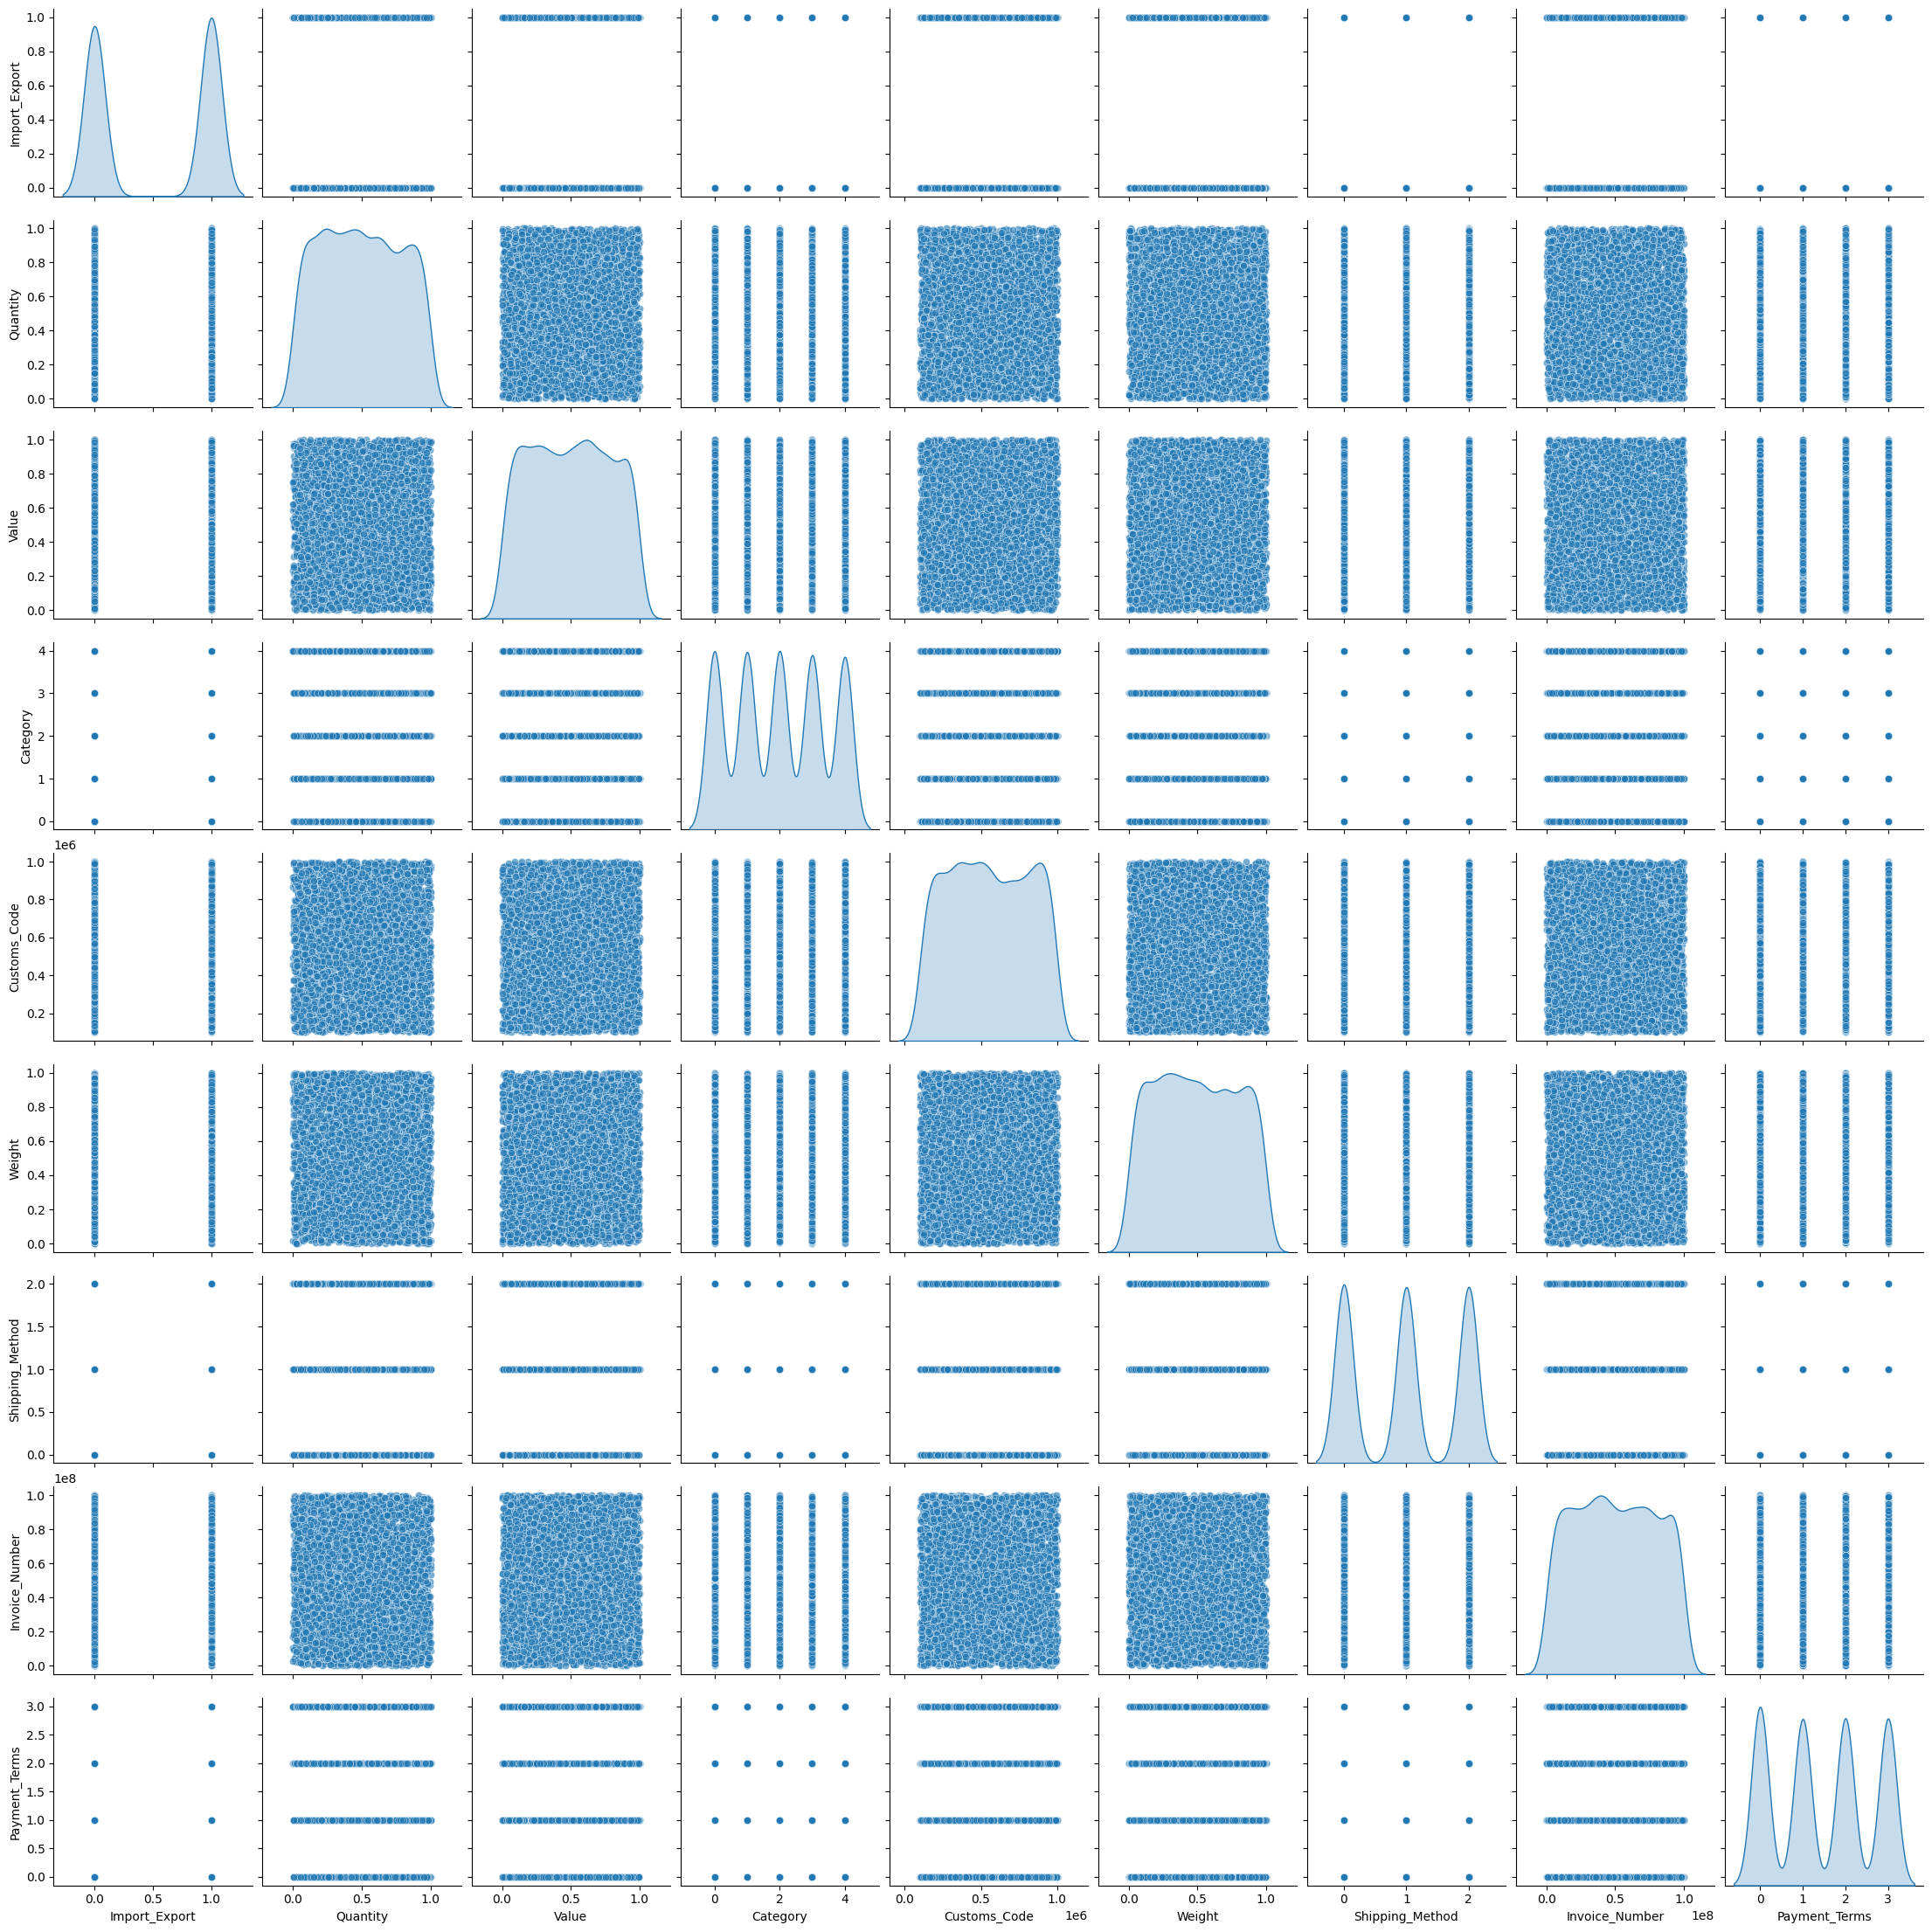

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables to numeric for plotting
encoded_df = ac05_df_preprocessed.copy()
for col in ac05_cat_columns:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

sns.pairplot(encoded_df, diag_kind='kde', plot_kws={'alpha':0.6})
plt.show()


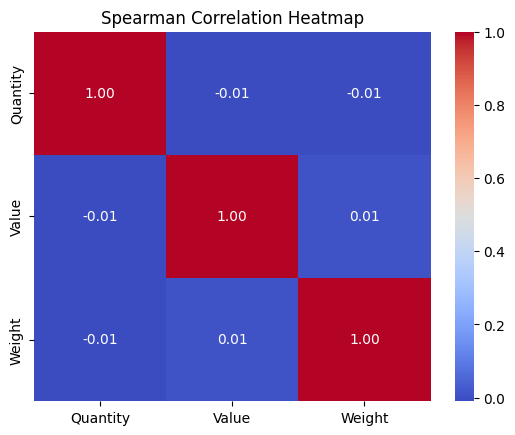

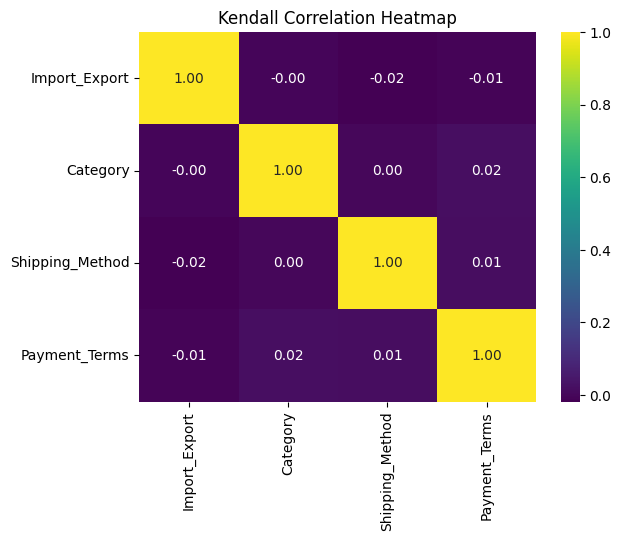

In [15]:
sns.heatmap(ac05_spearman_corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

sns.heatmap(ac05_kendall_corr_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Kendall Correlation Heatmap')
plt.show()


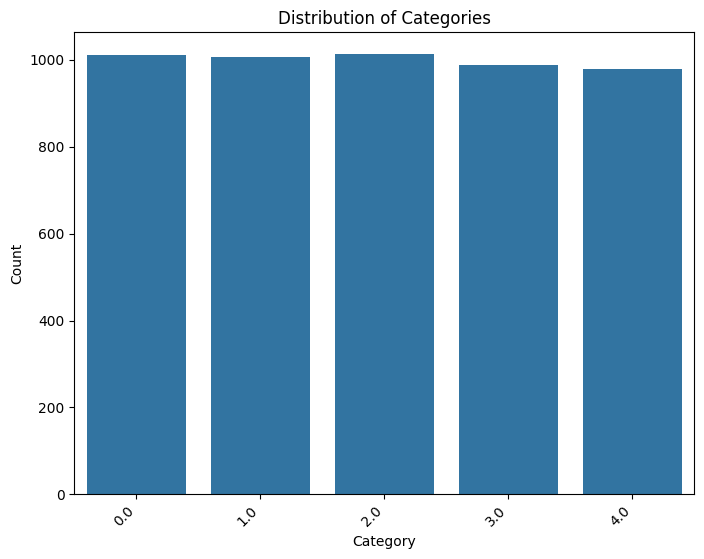

In [16]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=ac05_df_preprocessed)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

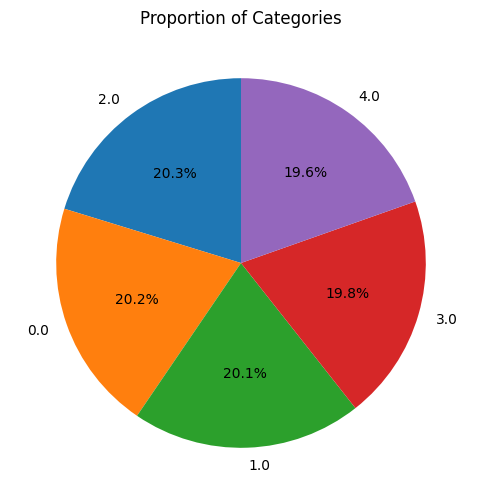

In [17]:
# Pie Chart
plt.figure(figsize=(6, 6))
ac05_category_counts = ac05_df_preprocessed['Category'].value_counts()
plt.pie(ac05_category_counts, labels=ac05_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Categories')
plt.show()

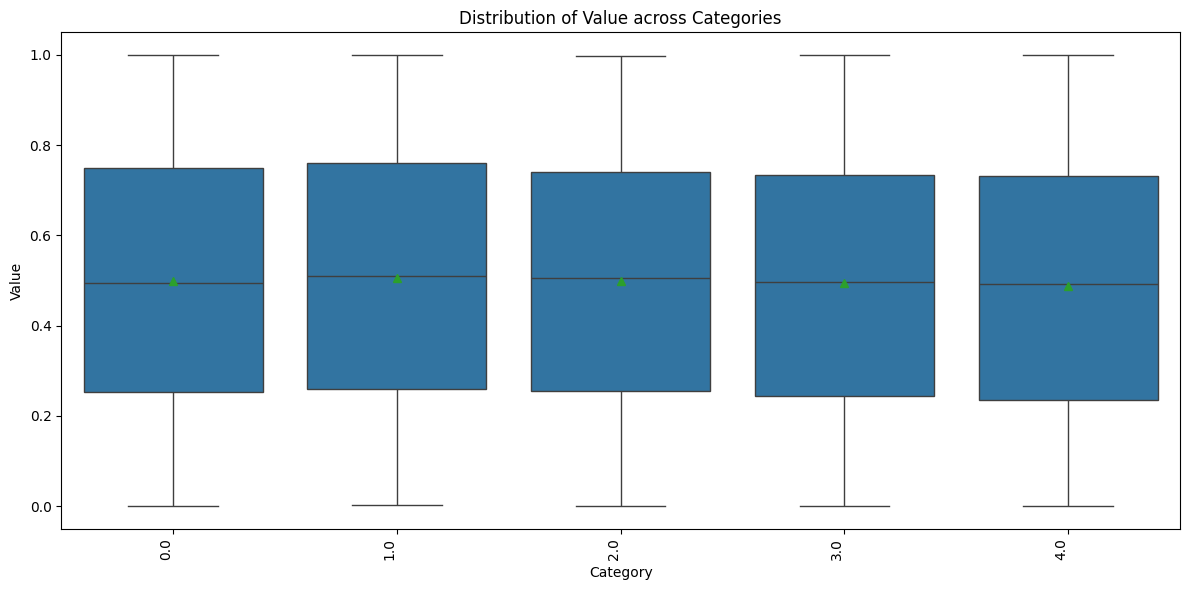

In [18]:
# Box-Whisker Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Value', data=ac05_df_preprocessed, order=sorted(ac05_df_preprocessed['Category'].unique()),
            showmeans=True,  # Show median dot
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})  # Customize outliers
plt.title('Distribution of Value across Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

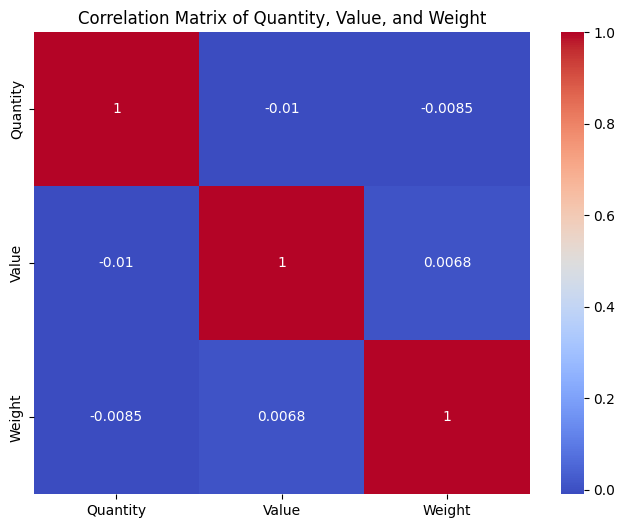

In [19]:
# Heatmap
plt.figure(figsize=(8, 6))
ac05_correlation_matrix = ac05_df_preprocessed[['Quantity', 'Value', 'Weight']].corr()
sns.heatmap(ac05_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Quantity, Value, and Weight')
plt.show()

Inferential Statistics

In [20]:
# Select the two categorical variables for the test
ac05_categorical_var1 = 'Import_Export'
ac05_categorical_var2 = 'Shipping_Method'

# Create a contingency table
ac05_contingency_table = pd.crosstab(ac05_df_preprocessed[ac05_categorical_var1],
                                     ac05_df_preprocessed[ac05_categorical_var2])

# Print the contingency table
print("Contingency Table:")
print(ac05_contingency_table)


# Perform the Chi-squared test
ac05_chi2_stat, ac05_p_value, ac05_dof, ac05_expected_freq = chi2_contingency(ac05_contingency_table)

# Print the results
print(f"Chi-squared statistic: {ac05_chi2_stat}")
print(f"P-value: {ac05_p_value}")
print(f"Degrees of freedom: {ac05_dof}")
print("Expected frequencies:")
print(ac05_expected_freq)

# Interpret the results
ac05_alpha = 0.05  # Significance level
if ac05_p_value < ac05_alpha:
    print("Reject the null hypothesis. There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between the variables.")

Contingency Table:
Shipping_Method  0.0  1.0  2.0
Import_Export                 
0.0              825  761  854
1.0              858  897  806
Chi-squared statistic: 10.269016863504248
P-value: 0.005889946104193372
Degrees of freedom: 2
Expected frequencies:
[[821.13977205 808.94221156 809.9180164 ]
 [861.86022795 849.05778844 850.0819836 ]]
Reject the null hypothesis. There is a significant association between the variables.


In [21]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your preprocessed dataset is named 'ac05_df_preprocessed'
# and your non-categorical columns are 'Quantity', 'Value', 'Weight'

# List of non-categorical variables
ac05_non_categorical_vars = ['Quantity', 'Value', 'Weight']

# Loop through each variable
for ac05_var in ac05_non_categorical_vars:
    print(f"\n--- Tests for {ac05_var} ---")

    # Shapiro-Wilk Test
    ac05_shapiro_stat, ac05_shapiro_p_value = stats.shapiro(ac05_df_preprocessed[ac05_var])
    print(f"Shapiro-Wilk Test - Statistic: {ac05_shapiro_stat}, P-value: {ac05_shapiro_p_value}")
    if ac05_shapiro_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Kolmogorov-Smirnov Test
    ac05_ks_stat, ac05_ks_p_value = stats.kstest(ac05_df_preprocessed[ac05_var], 'norm')
    print(f"Kolmogorov-Smirnov Test - Statistic: {ac05_ks_stat}, P-value: {ac05_ks_p_value}")
    if ac05_ks_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Anderson-Darling Test
    ac05_anderson_result = stats.anderson(ac05_df_preprocessed[ac05_var])
    print("Anderson-Darling Test - Statistic:", ac05_anderson_result.statistic)
    # Check only for 5% significance level
    if ac05_anderson_result.statistic < ac05_anderson_result.critical_values[2]:  # Index 2 corresponds to 5%
        print(f"Data looks normal (fail to reject H0) at 5% significance level")
    else:
        print(f"Data does not look normal (reject H0) at 5% significance level")

    # Jarque-Bera Test
    ac05_jb_stat, ac05_jb_p_value = stats.jarque_bera(ac05_df_preprocessed[ac05_var])
    print(f"Jarque-Bera Test - Statistic: {ac05_jb_stat}, P-value: {ac05_jb_p_value}")
    if ac05_jb_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")


--- Tests for Quantity ---
Shapiro-Wilk Test - Statistic: 0.956966146022694, P-value: 4.401040284295917e-36
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 51.91956119854876
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 289.4057458664715, P-value: 1.433312107769897e-63
Data does not look normal (reject H0) at 5% significance level

--- Tests for Value ---
Shapiro-Wilk Test - Statistic: 0.9557478664510971, P-value: 1.748436265100394e-36
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 53.90784393940521
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 294.9568977662426

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


The results indicate that none of the variables (`Quantity`, `Value`, `Weight`) follow a normal distribution based on the four statistical tests. Here’s a detailed interpretation for each test and the overall conclusion:

---

### **Summary of Results:**
1. **Shapiro-Wilk Test:**
   - P-values for all three variables are extremely small (near zero).
   - Interpretation: Reject the null hypothesis (\(H_0\)) for all variables, meaning the data does not follow a normal distribution.

2. **Kolmogorov-Smirnov Test:**
   - P-values are all 0.0, indicating significant deviation from normality.
   - Interpretation: Reject \(H_0\), confirming the data is not normally distributed.

3. **Anderson-Darling Test:**
   - The test statistic for each variable is much larger than the critical values (at the 5% significance level).
   - Interpretation: Reject \(H_0\), suggesting the data does not follow a normal distribution.

4. **Jarque-Bera Test:**
   - P-values for all variables are effectively zero.
   - Interpretation: Reject \(H_0\), meaning the skewness and kurtosis deviate significantly from a normal distribution.

---

### **Conclusion:**
The results from all four tests consistently show that the data for all three variables (`Quantity`, `Value`, `Weight`) **do not follow a normal distribution** at the 5% significance level.

---



# **Unsupervised Machine Learning**

In [22]:
# Select relevant columns for clustering
ac05_cluster_data = ac05_df_preprocessed[['Quantity', 'Value', 'Weight']]

# Store results
ac05_results = []

# Loop through different cluster numbers
for ac05_n_clusters in range(2, 6):
    # Hierarchical Clustering
    ac05_hc = AgglomerativeClustering(n_clusters=ac05_n_clusters,metric = 'euclidean', linkage='ward')
    ac05_hc_labels = ac05_hc.fit_predict(ac05_cluster_data)
    ac05_results.append(['HC', ac05_n_clusters, silhouette_score(ac05_cluster_data, ac05_hc_labels),
                         davies_bouldin_score(ac05_cluster_data, ac05_hc_labels)])

    # K-Means Clustering
    ac05_kmeans = KMeans(n_clusters=ac05_n_clusters, random_state=11006)
    ac05_kmeans_labels = ac05_kmeans.fit_predict(ac05_cluster_data)
    ac05_results.append(['KM', ac05_n_clusters, silhouette_score(ac05_cluster_data, ac05_kmeans_labels),
                         davies_bouldin_score(ac05_cluster_data, ac05_kmeans_labels)])

    # BIRCH Clustering
    ac05_birch = Birch(n_clusters=ac05_n_clusters)
    ac05_birch_labels = ac05_birch.fit_predict(ac05_cluster_data)
    ac05_results.append(['BIRCH', ac05_n_clusters, silhouette_score(ac05_cluster_data, ac05_birch_labels),
                         davies_bouldin_score(ac05_cluster_data, ac05_birch_labels)])

# Create a DataFrame from the results
ac05_results_df = pd.DataFrame(ac05_results, columns=['Model', 'n_clusters', 'Silhouette Score', 'Davies-Bouldin Index'])

# Print the results DataFrame
print(ac05_results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(


    Model  n_clusters  Silhouette Score  Davies-Bouldin Index
0      HC           2          0.217572              1.758415
1      KM           2          0.243190              1.648512
2   BIRCH           2          0.236303              1.672941
3      HC           3          0.187409              1.448307
4      KM           3          0.244735              1.321895
5   BIRCH           3          0.236303              1.672941
6      HC           4          0.206279              1.357443
7      KM           4          0.262289              1.179377
8   BIRCH           4          0.236303              1.672941
9      HC           5          0.198503              1.225598
10     KM           5          0.267307              1.077080
11  BIRCH           5          0.236303              1.672941


In [23]:
# Analysis Objective: Segment the Data based on Quantity and Weight

# Subset the DataFrame based on Quantity and Weight
ac05_subset = ac05_df_preprocessed[['Quantity', 'Weight', 'Value']]
print(ac05_subset)


       Quantity    Weight     Value
2396   0.812256  0.591599  0.023776
7470   0.923200  0.386992  0.389028
11831  0.651847  0.731634  0.672365
5322   0.943527  0.761660  0.209416
2638   0.626615  0.135785  0.902880
...         ...       ...       ...
13867  0.215480  0.475033  0.363484
5096   0.249224  0.075367  0.681807
5973   0.797337  0.439602  0.673167
3845   0.150996  0.183336  0.051345
437    0.891259  0.207510  0.520045

[5001 rows x 3 columns]


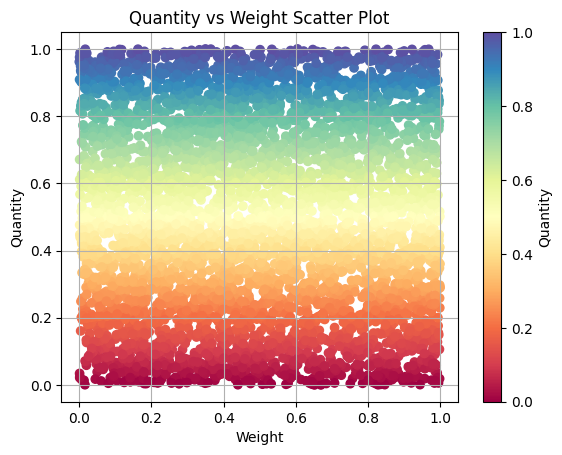

In [24]:
# Plot ac05_subset Data
import matplotlib.pyplot as plt

plt.scatter(x=ac05_subset['Weight'], y=ac05_subset['Quantity'], c=ac05_subset['Quantity'], cmap='Spectral')
plt.xlabel('Weight')
plt.ylabel('Quantity')
plt.title('Quantity vs Weight Scatter Plot')
plt.colorbar(label='Quantity')
plt.grid()
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering for 2 clusters
ac05_ah_2cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
ac05_ah_2cluster_model = ac05_ah_2cluster.fit_predict(ac05_cluster_data)

# Print the resulting cluster labels
print(ac05_ah_2cluster_model)


[1 1 0 ... 1 1 1]


In [26]:
from sklearn.cluster import AgglomerativeClustering

# 2-cluster model
ac05_ah_2cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
ac05_ah_2cluster_model = ac05_ah_2cluster.fit_predict(ac05_subset)
print("2-cluster model:", ac05_ah_2cluster_model)

# 3-cluster model
ac05_ah_3cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac05_ah_3cluster_model = ac05_ah_3cluster.fit_predict(ac05_subset)
print("3-cluster model:", ac05_ah_3cluster_model)

# 4-cluster model
ac05_ah_4cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
ac05_ah_4cluster_model = ac05_ah_4cluster.fit_predict(ac05_subset)
print("4-cluster model:", ac05_ah_4cluster_model)

# 5-cluster model
ac05_ah_5cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
ac05_ah_5cluster_model = ac05_ah_5cluster.fit_predict(ac05_subset)
print("5-cluster model:", ac05_ah_5cluster_model)


2-cluster model: [1 1 0 ... 1 1 1]
3-cluster model: [0 0 1 ... 0 0 0]
4-cluster model: [3 3 1 ... 3 0 3]
5-cluster model: [1 1 0 ... 1 3 1]


### Interpretation:
- In **2-cluster model**, the data points are divided into **2 clusters** (label `0` and label `1`).
- In **3-cluster model**, the data points are divided into **3 clusters** (labels `0`, `1`, and `2`).
- In **4-cluster model**, the data points are divided into **4 clusters** (labels `0`, `1`, `2`, and `3`).
- In **5-cluster model**, the data points are divided into **5 clusters** (labels `0`, `1`, `2`, `3`, and `4`).



In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate scores for 2-cluster model
silhouette_2 = silhouette_score(ac05_subset, ac05_ah_2cluster_model)
davies_bouldin_2 = davies_bouldin_score(ac05_subset, ac05_ah_2cluster_model)
print("2-Cluster Silhouette Score:", silhouette_2)
print("2-Cluster Davies-Bouldin Index:", davies_bouldin_2)

# Calculate scores for 3-cluster model
silhouette_3 = silhouette_score(ac05_subset, ac05_ah_3cluster_model)
davies_bouldin_3 = davies_bouldin_score(ac05_subset, ac05_ah_3cluster_model)
print("3-Cluster Silhouette Score:", silhouette_3)
print("3-Cluster Davies-Bouldin Index:", davies_bouldin_3)

# Calculate scores for 4-cluster model
silhouette_4 = silhouette_score(ac05_subset, ac05_ah_4cluster_model)
davies_bouldin_4 = davies_bouldin_score(ac05_subset, ac05_ah_4cluster_model)
print("4-Cluster Silhouette Score:", silhouette_4)
print("4-Cluster Davies-Bouldin Index:", davies_bouldin_4)

# Calculate scores for 5-cluster model
silhouette_5 = silhouette_score(ac05_subset, ac05_ah_5cluster_model)
davies_bouldin_5 = davies_bouldin_score(ac05_subset, ac05_ah_5cluster_model)
print("5-Cluster Silhouette Score:", silhouette_5)
print("5-Cluster Davies-Bouldin Index:", davies_bouldin_5)


2-Cluster Silhouette Score: 0.21757164829464581
2-Cluster Davies-Bouldin Index: 1.7584147541585406
3-Cluster Silhouette Score: 0.18740920330807992
3-Cluster Davies-Bouldin Index: 1.4483065821825438
4-Cluster Silhouette Score: 0.2062794758227728
4-Cluster Davies-Bouldin Index: 1.3574430356620821
5-Cluster Silhouette Score: 0.19850329942222403
5-Cluster Davies-Bouldin Index: 1.225597703056967


Here’s an interpretation of the clustering scores:

### **Silhouette Score**
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. Higher scores indicate well-separated and compact clusters.
- **2-Cluster Score (0.218):** Indicates moderately well-separated clusters. However, the score is not very high, suggesting some overlap or less distinction between clusters.
- **3-Cluster Score (0.187):** A lower score compared to the 2-cluster solution, indicating that adding a third cluster creates overlap and reduces cluster cohesion.
- **4-Cluster Score (0.206):** Slight improvement compared to 3-clusters but still lower than the 2-cluster model.
- **5-Cluster Score (0.199):** A small decrease compared to the 4-cluster solution, suggesting diminishing returns with additional clusters.

**Observation:** The 2-cluster model performs best in terms of the Silhouette Score, meaning it provides the most distinct separation.

---

### **Davies-Bouldin Index**
The Davies-Bouldin Index evaluates the ratio of within-cluster scatter to between-cluster separation. Lower values are better and indicate tighter, well-separated clusters.
- **2-Cluster Score (1.758):** The clusters are reasonably well-separated but could be improved.
- **3-Cluster Score (1.448):** A significant improvement compared to the 2-cluster model, suggesting better separation and compactness with three clusters.
- **4-Cluster Score (1.357):** Further improvement in cluster quality compared to the 3-cluster solution.
- **5-Cluster Score (1.226):** The best score, indicating tighter and better-separated clusters with five clusters.

**Observation:** The 5-cluster model performs best in terms of the Davies-Bouldin Index, suggesting it provides the most compact and well-separated clusters.

---

### **Final Recommendation**
- If the priority is **interpretability** and simplicity, the 2-cluster model is preferable as it achieves a reasonable Silhouette Score and fewer clusters are easier to explain.
- If the priority is **precision** and maximizing cluster separation, the 5-cluster model is preferable due to its lower Davies-Bouldin Index.

The choice depends on your use case:
- For exploratory analysis or identifying broad groupings, use **2 clusters**.
- For detailed segmentation, use **5 clusters**.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 2-cluster K-Means model
ac05_km_2cluster = KMeans(n_clusters=2, init='random', random_state=55008015)
ac05_km_2cluster_model = ac05_km_2cluster.fit_predict(ac05_subset)

# 3-cluster K-Means model
ac05_km_3cluster = KMeans(n_clusters=3, init='random', random_state=55008015)
ac05_km_3cluster_model = ac05_km_3cluster.fit_predict(ac05_subset)

# 4-cluster K-Means model
ac05_km_4cluster = KMeans(n_clusters=4, init='random', random_state=55008015)
ac05_km_4cluster_model = ac05_km_4cluster.fit_predict(ac05_subset)

# 5-cluster K-Means model
ac05_km_5cluster = KMeans(n_clusters=5, init='random', random_state=55008015)
ac05_km_5cluster_model = ac05_km_5cluster.fit_predict(ac05_subset)

# Calculate and print scores for each model
# 2-cluster model scores
silhouette_2 = silhouette_score(ac05_subset, ac05_km_2cluster_model)
davies_bouldin_2 = davies_bouldin_score(ac05_subset, ac05_km_2cluster_model)
print("2-Cluster Silhouette Score:", silhouette_2)
print("2-Cluster Davies-Bouldin Index:", davies_bouldin_2)

# 3-cluster model scores
silhouette_3 = silhouette_score(ac05_subset, ac05_km_3cluster_model)
davies_bouldin_3 = davies_bouldin_score(ac05_subset, ac05_km_3cluster_model)
print("3-Cluster Silhouette Score:", silhouette_3)
print("3-Cluster Davies-Bouldin Index:", davies_bouldin_3)

# 4-cluster model scores
silhouette_4 = silhouette_score(ac05_subset, ac05_km_4cluster_model)
davies_bouldin_4 = davies_bouldin_score(ac05_subset, ac05_km_4cluster_model)
print("4-Cluster Silhouette Score:", silhouette_4)
print("4-Cluster Davies-Bouldin Index:", davies_bouldin_4)

# 5-cluster model scores
silhouette_5 = silhouette_score(ac05_subset, ac05_km_5cluster_model)
davies_bouldin_5 = davies_bouldin_score(ac05_subset, ac05_km_5cluster_model)
print("5-Cluster Silhouette Score:", silhouette_5)
print("5-Cluster Davies-Bouldin Index:", davies_bouldin_5)


2-Cluster Silhouette Score: 0.24500801183628604
2-Cluster Davies-Bouldin Index: 1.6358522547781105
3-Cluster Silhouette Score: 0.24706533326868893
3-Cluster Davies-Bouldin Index: 1.303397652412597
4-Cluster Silhouette Score: 0.26972191071213913
4-Cluster Davies-Bouldin Index: 1.1105633979097402
5-Cluster Silhouette Score: 0.27091615319889717
5-Cluster Davies-Bouldin Index: 1.060775230339281


Here’s the interpretation of the clustering results:

### 1. **Silhouette Score**:
   - **Definition**: Measures how well samples are clustered. It ranges from -1 to 1, where:
     - **1**: Points are well-matched to their cluster and far from other clusters.
     - **0**: Points are on or very close to the boundary between two clusters.
     - **Negative values**: Points are likely misclassified into the wrong clusters.

   - **Observation**:
     - The Silhouette Score improves slightly as the number of clusters increases, with the highest value for 5 clusters (\(0.2709\)).
     - However, the improvement is marginal, suggesting that adding more clusters doesn’t drastically enhance the clustering quality.

### 2. **Davies-Bouldin Index**:
   - **Definition**: Measures the average similarity ratio between clusters, where:
     - **Lower values**: Better-defined and more compact clusters.
     - **Higher values**: Poorly separated or overlapping clusters.

   - **Observation**:
     - The Davies-Bouldin Index decreases with more clusters, reaching its lowest value at 5 clusters (\(1.0608\)).
     - This indicates that as the number of clusters increases, the clusters become better separated and more compact.

---

### **Overall Interpretation**:
- The **4-cluster model** and **5-cluster model** perform better than the 2- or 3-cluster models, as indicated by their higher Silhouette Scores and lower Davies-Bouldin Index values.
- While the 5-cluster model shows the best Davies-Bouldin Index, its Silhouette Score improvement over the 4-cluster model is negligible (\(0.2697 \rightarrow 0.2709\)).
- **Recommendation**: Choose the **4-cluster model** for a balance of compactness, separation, and simplicity. If interpretability is critical, fewer clusters (e.g., 3 or 4) might be preferred over higher numbers.

      index  Quantity    Weight     Value  cluster_number
3424   1331  0.403124  0.258448  0.512867               0
2906   9849  0.515971  0.040929  0.877393               0
1292   8367  0.102133  0.053703  0.638019               0
1290   7495  0.557525  0.091915  0.487069               0
1288   5182  0.088715  0.043459  0.891141               0
...     ...       ...       ...       ...             ...
4336  14110  0.668769  0.687096  0.734596               4
1436  12313  0.846601  0.750190  0.528363               4
2772  14903  0.965355  0.840992  0.708374               4
1473  10827  0.873035  0.693176  0.621706               4
2500  13515  0.789226  0.402215  0.630380               4

[5001 rows x 5 columns]


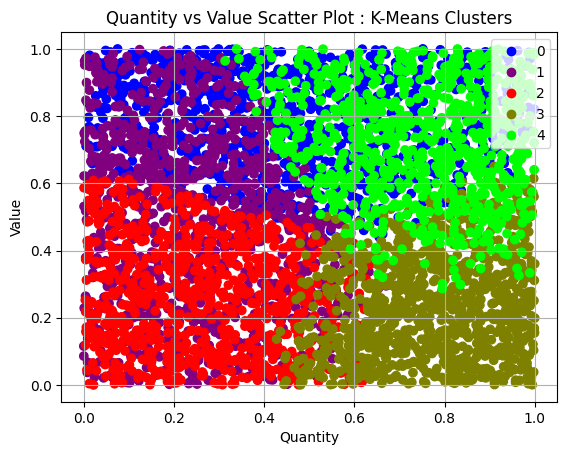

In [29]:
ac05_subset_kmcluster = ac05_subset.copy()
ac05_subset_kmcluster.reset_index(level=0, inplace=True, names='index')
ac05_subset_kmcluster['cluster_number'] = ac05_km_5cluster_model
ac05_subset_kmcluster.sort_values('cluster_number', inplace=True)
print(ac05_subset_kmcluster)
# Get unique K-Means cluster labels
ac05_cluster_labels_km = list(ac05_subset_kmcluster['cluster_number'].unique())

# Scatter plot (using 'Quantity', 'Weight', and 'Value' as the new variables)
ac05_scatter_plot_km = plt.scatter(
    x=ac05_subset_kmcluster['Quantity'],
    y=ac05_subset_kmcluster['Value'],
    c=ac05_subset_kmcluster['cluster_number'],
    cmap='brg'
)

# Add legend
plt.legend(handles=ac05_scatter_plot_km.legend_elements()[0], labels=ac05_cluster_labels_km)
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Quantity vs Value Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

Here’s the interpretation of the **Decision Tree model output**:

---

### **1. Overall Accuracy**:
- **Accuracy**: 80.37%
  - The model correctly predicts 80.37% of the total cases.
  - Like Logistic Regression, the high accuracy is primarily driven by the majority class (class 0), which dominates the dataset.

---

### **2. Precision, Recall, and F1-Score**:
#### **Class 0 (Non-Churners)**:
- **Precision (0.81)**:
  - When the model predicts **class 0**, it is correct 81% of the time.
- **Recall (0.99)**:
  - The model identifies **99% of actual class 0 instances**, performing extremely well for this class.
- **F1-Score (0.89)**:
  - A balanced score indicating strong performance for class 0.

#### **Class 1 (Churners)**:
- **Precision (0.14)**:
  - When the model predicts **class 1**, it is correct only 14% of the time.
  - Indicates significant misclassification of non-churners as churners.
- **Recall (0.01)**:
  - The model identifies **only 1% of actual class 1 instances**, failing to detect most churners.
- **F1-Score (0.02)**:
  - A very low score, showing the model’s inability to effectively classify churners.

---

### **3. Support**:
- **Class 0**: 488 instances.
- **Class 1**: 113 instances.
- The dataset is highly **imbalanced**, with many more instances of class 0 than class 1.

---

### **4. Macro and Weighted Averages**:
- **Macro Average**:
  - Precision, recall, and F1-scores are averaged equally across classes.
  - Indicates **poor overall balance** (Macro F1: 0.45), reflecting the poor performance for class 1.
- **Weighted Average**:
  - Accounts for class imbalance by giving more weight to the majority class (class 0).
  - The Weighted F1-score of 0.73 highlights the dominance of class 0 in the overall performance.

---

### **Key Comparison with Logistic Regression**:
1. **Accuracy**:
   - Decision Tree: 80.37% vs. Logistic Regression: 81.20%
   - Logistic Regression performs marginally better overall.

2. **Class 1 (Churners)**:
   - Both models perform poorly on class 1, but the Decision Tree performs slightly worse in terms of recall (1% vs. 0% for Logistic Regression).

3. **Class 0 (Non-Churners)**:
   - Both models perform well for class 0, with similar precision and recall.

---

### **Key Insights**:
1. **Imbalanced Dataset Issue**:
   - Like Logistic Regression, the Decision Tree fails to effectively classify the minority class (class 1).
   - The high accuracy is misleading, as it is driven by the dominance of class 0.

2. **Action Required**:
   - Address the imbalance in the dataset using techniques like:
     - **Resampling**: Oversample the minority class (e.g., SMOTE) or undersample the majority class.
     - **Hyperparameter Tuning**: Adjust the `class_weight` parameter in the Decision Tree or optimize depth, leaf size, and split criteria.

3. **Recommendation**:
   - Refit the model with balanced classes or a resampled dataset.
   - Evaluate using metrics like **ROC-AUC** or **precision/recall for class 1**, as accuracy alone is not sufficient for imbalanced datasets.

4. **Preference Between Models**:
   - Logistic Regression slightly outperforms the Decision Tree, especially in recall for class 1.
   - Use the enhanced Logistic Regression with class balancing techniques for better results.

In [30]:
ac05_df_preprocessed.head()

Transaction_ID  \
2396   2a2e0ea7-5834-4eaf-8f33-2bab9e051c94   
7470   c844e82b-952c-40d9-87e6-457fb344e9eb   
11831  d63f8fc3-39e8-4d7d-a138-a21c623de753   
5322   13337bb7-168c-4202-85d3-3f0978dfcadf   
2638   8b680b6a-6c9d-44e8-9ccc-0c1ddd5c4caf   

                                            Country  Product  Import_Export  \
2396                                    Philippines     next            1.0   
7470                                       Suriname      now            0.0   
11831                       Cocos (Keeling) Islands   appear            1.0   
5322                       Turks and Caicos Islands  project            0.0   
2638   Antarctica (the territory South of 60 deg S)    speak            0.0   

       Quantity     Value        Date  Category               Port  \
2396   0.812256  0.023776  07-06-2021       2.0  South Lorettafort   
7470   0.923200  0.389028  22-12-2023       3.0       Victoriaside   
11831  0.651847  0.672365  03-07-2023       3.0       Hubbardmouth   
5322   0.943527  0.209416  18-11-2022       0.0       Patriciafort   
2638   0.626615  0.902880  28-11-2021       1.0  New Denisechester   

       Customs_Code    Weight  Shipping_Method                  Supplier  \
2396         139327  0.591599              0.0                Weaver PLC   
7470         720369  0.386992              1.0  Love, Proctor and Garcia   
11831        263267  0.731634              1.0          Trevino and Sons   
5322         460290  0.761660              0.0             Foster-Barber   
2638         443091  0.135785              1.0  Porter, Ford and Johnson   

            Customer  Invoice_Number  Payment_Terms  
2396   Nathan Fisher        20985834            3.0  
7470   Timothy Gibbs        37415950            1.0  
11831  Justin Taylor        82965932            0.0  
5322    Joseph Evans        71448135            3.0  
2638    Erica Fowler        70262562            2.0

# Decision Tree

Accuracy: 52.35%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.15      0.23       472
         1.0       0.53      0.85      0.65       529

    accuracy                           0.52      1001
   macro avg       0.51      0.50      0.44      1001
weighted avg       0.51      0.52      0.46      1001


Confusion Matrix:
[[ 72 400]
 [ 77 452]]


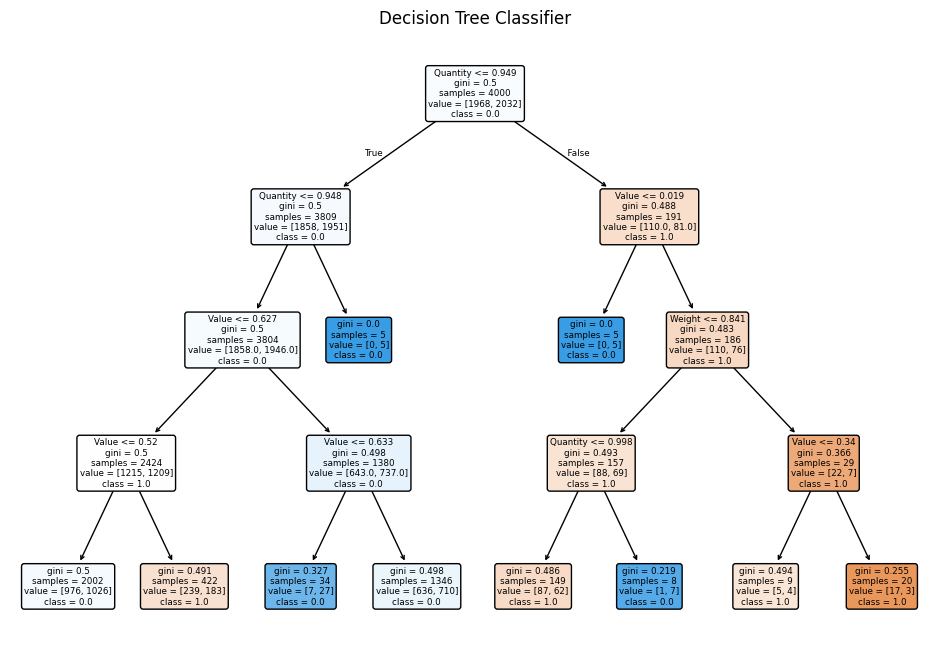

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming your dataset has the columns 'Quantity', 'Weight', 'Value', and 'Import_Export'
X = ac05_df_preprocessed[['Quantity', 'Weight', 'Value']]  # Features
y = ac05_df_preprocessed['Import_Export']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with limitations
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,               # Limit the depth of the tree to 4
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5         # Minimum samples at a leaf node
)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions using the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    rounded=True
)
plt.title("Decision Tree Classifier")
plt.show()


Here’s the interpretation of the provided metrics for your decision tree classifier:

---

### 1. **Accuracy: 52.35%**
- **Definition**: The overall percentage of correctly predicted samples out of the total test samples.
- **Interpretation**: The model correctly predicts approximately 52.35% of the test samples. This is only slightly better than random guessing for a binary classification problem.

---

### 2. **Classification Report**:
#### Key Metrics:
- **Precision**: The proportion of true positive predictions out of all positive predictions.
  - For class `0.0`: 48% of predictions for class `0.0` were correct.
  - For class `1.0`: 53% of predictions for class `1.0` were correct.
- **Recall**: The proportion of actual positives correctly identified.
  - For class `0.0`: Only 15% of actual class `0.0` samples were correctly identified.
  - For class `1.0`: 85% of actual class `1.0` samples were correctly identified.
- **F1-Score**: The harmonic mean of precision and recall, representing a balance between the two.
  - For class `0.0`: Low at 0.23, due to poor recall.
  - For class `1.0`: Decent at 0.65, driven by good recall.
- **Support**: The number of samples for each class in the test data.
  - Class `0.0`: 472 samples.
  - Class `1.0`: 529 samples.

#### Overall Performance:
- The model favors **class `1.0`**, with high recall but mediocre precision.
- Class `0.0` is poorly handled, indicating class imbalance or difficulty in distinguishing features for this class.

---

### 3. **Confusion Matrix**:
| Predicted vs Actual | Class `0.0` | Class `1.0` |
|----------------------|-------------|-------------|
| **Actual `0.0`**      | 72          | 400         |
| **Actual `1.0`**      | 77          | 452         |

#### Insights:
- **True Positives (TP)**: 452 instances of `1.0` correctly predicted.
- **True Negatives (TN)**: 72 instances of `0.0` correctly predicted.
- **False Positives (FP)**: 77 instances of `1.0` incorrectly predicted as `0.0`.
- **False Negatives (FN)**: 400 instances of `0.0` incorrectly predicted as `1.0`.

#### Interpretation:
- The model performs well on classifying `1.0` (high TP rate) but struggles significantly with `0.0` (high FN rate).
- A high number of misclassifications for class `0.0` suggests that the model’s decision boundary might not be well-optimized for distinguishing this class.



# LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming your dataset has the columns 'Quantity', 'Weight', 'Value', and 'Import_Export'
X = ac05_df_preprocessed[['Quantity', 'Weight', 'Value']]  # Features
y = ac05_df_preprocessed['Import_Export']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,       # Allow more iterations if convergence takes longer
    solver='lbfgs'       # Default solver for small to medium datasets
)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions using the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 50.65%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.25      0.32       472
         1.0       0.52      0.74      0.61       529

    accuracy                           0.51      1001
   macro avg       0.49      0.49      0.47      1001
weighted avg       0.49      0.51      0.48      1001


Confusion Matrix:
[[117 355]
 [139 390]]


# COMPARISON OF DT & LR

Decision Tree Accuracy: 52.35%

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.15      0.23       472
         1.0       0.53      0.85      0.65       529

    accuracy                           0.52      1001
   macro avg       0.51      0.50      0.44      1001
weighted avg       0.51      0.52      0.46      1001


Decision Tree Confusion Matrix:
[[ 72 400]
 [ 77 452]]


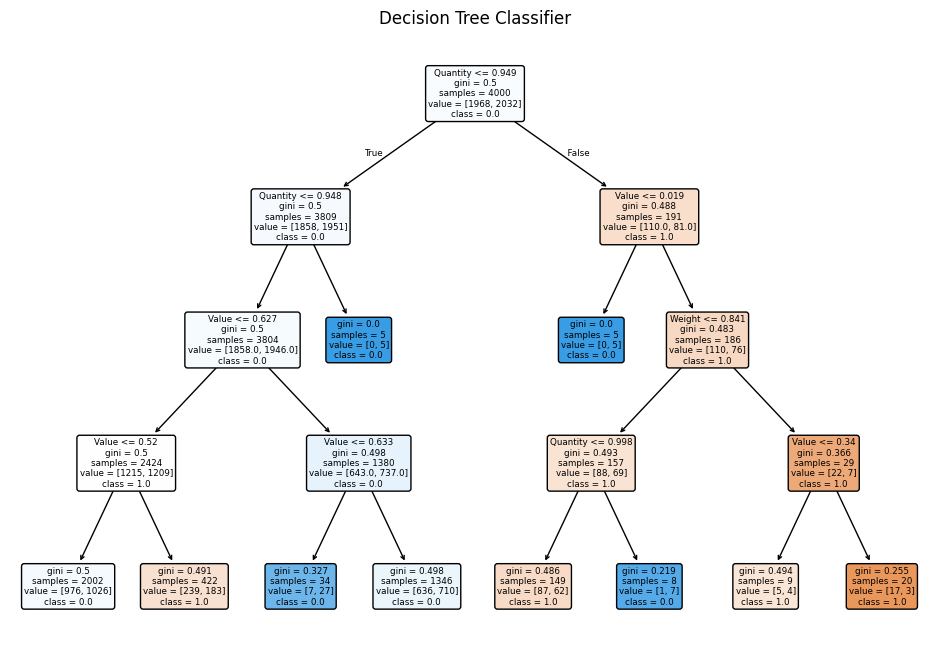


Logistic Regression Accuracy: 50.65%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.25      0.32       472
         1.0       0.52      0.74      0.61       529

    accuracy                           0.51      1001
   macro avg       0.49      0.49      0.47      1001
weighted avg       0.49      0.51      0.48      1001


Logistic Regression Confusion Matrix:
[[117 355]
 [139 390]]

Comparison of Models:
Decision Tree Accuracy: 52.35%
Logistic Regression Accuracy: 50.65%


In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming your dataset has the columns 'Quantity', 'Weight', 'Value', and 'Import_Export'
X = ac05_df_preprocessed[['Quantity', 'Weight', 'Value']]  # Features
y = ac05_df_preprocessed['Import_Export']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Logistic Regression
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs'
)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    rounded=True
)
plt.title("Decision Tree Classifier")
plt.show()

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Compare Accuracies
print("\nComparison of Models:")
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")


The comparison between **Logistic Regression (LR)** and **Decision Tree (DT)** highlights their respective strengths and weaknesses. Here's a detailed analysis:

---

### **Confusion Matrices**:
#### Logistic Regression:
- **True Positives (TP):** 390 (Correctly classified positive cases)
- **True Negatives (TN):** 117 (Correctly classified negative cases)
- **False Positives (FP):** 355 (Negative cases misclassified as positive)
- **False Negatives (FN):** 139 (Positive cases misclassified as negative)

#### Decision Tree:
- **True Positives (TP):** 452
- **True Negatives (TN):** 72
- **False Positives (FP):** 400
- **False Negatives (FN):** 77

---

### **Metric Comparison**:

| Metric                 | Logistic Regression | Decision Tree |
|-------------------------|---------------------|---------------|
| **Accuracy**            | 50.65%             | 52.35%        |
| **Precision (Class 0)** | 46%                | 48%           |
| **Recall (Class 0)**    | 25%                | 15%           |
| **F1-Score (Class 0)**  | 32%                | 23%           |
| **Precision (Class 1)** | 52%                | 53%           |
| **Recall (Class 1)**    | 74%                | 85%           |
| **F1-Score (Class 1)**  | 61%                | 65%           |
| **Weighted F1-Score**   | 48%                | 46%           |

---

### **Insights**:
#### 1. **Accuracy:**
- **Decision Tree** outperforms Logistic Regression with slightly higher accuracy (52.35% vs. 50.65%).
- However, both models perform poorly overall, likely due to challenges like imbalanced classes or lack of predictive features.

#### 2. **Class-Specific Metrics:**
- **Class 0 (Negative Class):**
  - Logistic Regression has higher recall (25%) compared to DT (15%), meaning it identifies more actual negatives.
  - Precision is nearly the same (46% vs. 48%), indicating that both models misclassify a significant portion of negative cases.
  
- **Class 1 (Positive Class):**
  - Decision Tree has better recall (85% vs. 74%) and slightly better precision (53% vs. 52%), indicating it handles the positive class better.

#### 3. **Weighted Metrics:**
- Logistic Regression has a slightly higher weighted F1-Score (48% vs. 46%), reflecting better overall balance between precision and recall across classes.

#### 4. **Confusion Matrices:**
- **Logistic Regression** misclassifies fewer negatives as positives (355 FP vs. 400 FP in DT).
- **Decision Tree** misclassifies fewer positives as negatives (77 FN vs. 139 FN in LR).

---

### **Strengths of Each Model**:
#### Logistic Regression:
- Performs better at balancing between classes (higher weighted F1-score).
- More robust in identifying negative cases (higher recall for Class 0).

#### Decision Tree:
- Performs better in identifying positive cases (higher recall for Class 1).
- Slightly better overall accuracy.

---

### **Recommendations for Improvement**:
1. **Class Imbalance Handling**:
   - The imbalance in the dataset (Class 0: 472, Class 1: 529) may cause bias toward Class 1.
   - Use **SMOTE**, **undersampling**, or **class weights** to address this.

2. **Feature Engineering**:
   - Explore additional features or transformations to enhance predictive power.

3. **Hyperparameter Tuning**:
   - Optimize both models using techniques like **GridSearchCV** to improve performance.

4. **Additional Models**:
   - Try ensemble methods (e.g., Random Forest, Gradient Boosting) or advanced models (e.g., SVM, XGBoost).

5. **Evaluation Metric**:
   - Accuracy alone is insufficient for imbalanced datasets. Use metrics like **F1-Score**, **ROC-AUC**, or **PR Curve**.



# COMPARISON OF DT & RANDOM FOREST


Comparison of Decision Tree and Random Forest:
                 Metric  Decision Tree  Random Forest
0              Accuracy       0.523477       0.512488
1  Precision (Weighted)       0.508216       0.501554
2     Recall (Weighted)       0.523477       0.512488
3   F1-Score (Weighted)       0.455276       0.487693


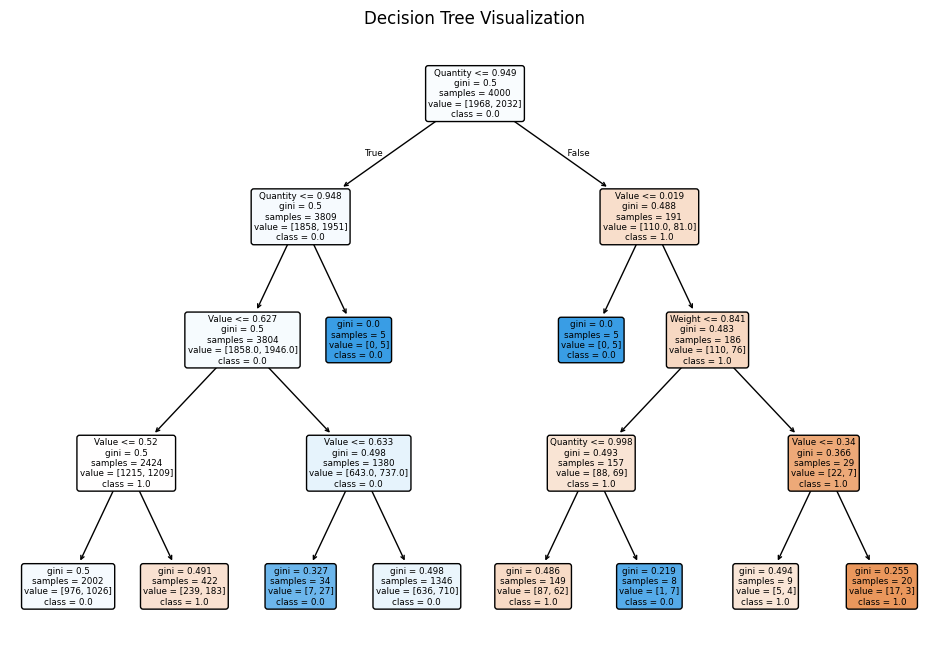


Decision Tree Confusion Matrix:
[[ 72 400]
 [ 77 452]]

Random Forest Confusion Matrix:
[[132 340]
 [148 381]]


In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset has the columns 'Quantity', 'Weight', 'Value', and 'Import_Export'
X = ac05_df_preprocessed[['Quantity', 'Weight', 'Value']]  # Features
y = ac05_df_preprocessed['Import_Export']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=100,          # Number of trees in the forest
    max_depth=4,               # Limit the depth of each tree
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5         # Minimum samples at a leaf node
)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_dt = classification_report(y_test, y_pred_dt, output_dict=True)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rf = classification_report(y_test, y_pred_rf, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Compare Metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Decision Tree': [
        accuracy_dt,
        classification_dt['weighted avg']['precision'],
        classification_dt['weighted avg']['recall'],
        classification_dt['weighted avg']['f1-score']
    ],
    'Random Forest': [
        accuracy_rf,
        classification_rf['weighted avg']['precision'],
        classification_rf['weighted avg']['recall'],
        classification_rf['weighted avg']['f1-score']
    ]
})

# Display Comparison Table
print("\nComparison of Decision Tree and Random Forest:")
print(comparison_df)

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Print Confusion Matrices
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_dt)

print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)


The results indicate the performance of the **Decision Tree (DT)** and **Random Forest (RF)** models. Let's interpret the metrics and confusion matrices:

---

### **Confusion Matrix:**
#### Decision Tree:
- **True Positives (TP):** 452 (Correctly classified positive cases)
- **True Negatives (TN):** 72 (Correctly classified negative cases)
- **False Positives (FP):** 400 (Negative cases misclassified as positive)
- **False Negatives (FN):** 77 (Positive cases misclassified as negative)

#### Random Forest:
- **True Positives (TP):** 381
- **True Negatives (TN):** 132
- **False Positives (FP):** 340
- **False Negatives (FN):** 148

**Observation:**  
- Random Forest improved on **True Negatives (TN)** but increased **False Negatives (FN)** compared to Decision Tree.  
- Decision Tree had more True Positives but struggled to identify True Negatives.

---

### **Metric Analysis:**
#### 1. **Accuracy:**
- **Decision Tree:** 52.35%
- **Random Forest:** 51.25%

Both models performed poorly overall, with only marginal differences. Accuracy is low, indicating both models are struggling to classify correctly.

#### 2. **Precision (Weighted):**
- **Decision Tree:** 50.82%
- **Random Forest:** 50.15%

Precision measures the proportion of correctly classified positive cases out of all predicted positives. Both models have similar precision, with Decision Tree being slightly better.

#### 3. **Recall (Weighted):**
- **Decision Tree:** 52.35%
- **Random Forest:** 51.25%

Recall is the proportion of actual positives correctly classified. Again, both models are comparable, but Decision Tree edges out slightly.

#### 4. **F1-Score (Weighted):**
- **Decision Tree:** 45.53%
- **Random Forest:** 48.77%

The F1-score balances precision and recall. While Random Forest has a slightly higher F1-score, both models indicate poor overall performance due to low scores.

---

### **Interpretation of Results:**
1. **Overall Performance:**
   - Both models are performing suboptimally, as indicated by low accuracy, precision, and F1-scores. This suggests issues with the dataset or the models' suitability for the task.
   
2. **Comparison of DT vs. RF:**
   - **Decision Tree** has slightly better accuracy and recall, meaning it correctly identifies more actual cases.
   - **Random Forest** has a higher F1-score, indicating a better balance between precision and recall.

3. **Challenges:**
   - **Imbalance in Confusion Matrix:** A high number of False Positives (FP) and False Negatives (FN) suggests difficulty in correctly predicting classes.
   - **Dataset Quality:** There might be issues like imbalanced classes, noise, or insufficient features contributing to poor performance.

---

### **Recommendations for Improvement:**
1. **Feature Engineering:**
   - Add more relevant features or use feature selection techniques to improve predictive power.
   
2. **Class Imbalance Handling:**
   - Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weights in the models.

3. **Hyperparameter Tuning:**
   - Optimize model parameters (e.g., max_depth, min_samples_split, n_estimators for RF) using GridSearchCV or RandomizedSearchCV.

4. **Data Quality:**
   - Check for noise, outliers, or irrelevant data points and preprocess them.

5. **Model Exploration:**
   - Try other models such as Gradient Boosting, XGBoost, or Support Vector Machines (SVM).


# REPORT

**Data Preprocessing Report: Import-Export Dataset**

---

### 1. **Dataset Overview**
The dataset consists of categorical variables (`Import_Export`, `Category`, `Shipping_Method`, `Payment_Terms`) and numerical variables (`Quantity`, `Value`, `Weight`). This report summarizes data preprocessing steps, statistical analyses, and actionable managerial insights.

---

### 2. **Categorical Variables Analysis**

#### Missing Value Treatment
- **Summary**: No missing values were detected in categorical variables across rows or columns.
- **Imputation**: Since there were no missing values, imputation was not required.

#### Encoding
Categorical variables were encoded as follows for analysis:

- **Import_Export**: Export = 0, Import = 1
- **Category**: Clothing = 0, Electronics = 1, Furniture = 2, Machinery = 3, Toys = 4
- **Shipping_Method**: Air = 0, Land = 1, Sea = 2
- **Payment_Terms**: Cash on Delivery = 0, Net 30 = 1, Net 60 = 2, Prepaid = 3

---

### 3. **Numerical Variables Analysis**

#### Missing Value Treatment
- **Summary**: No missing values detected in `Quantity`, `Value`, or `Weight`.
- **Imputation**: Not required.

#### Normalization
Numerical variables were normalized using min-max scaling, transforming the values between 0 and 1 for better model compatibility.

#### Descriptive Statistics
| Variable  | Min   | Max   | Mean   | Median | Mode   | Std. Dev | Skewness | Kurtosis |
|-----------|-------|-------|--------|--------|--------|----------|----------|----------|
| Quantity  | 0.0   | 1.0   | 0.4929 | 0.4837 | 0.1534 | 0.2854   | 0.0473   | -1.1747  |
| Value     | 0.0   | 1.0   | 0.4972 | 0.4996 | 0.5303 | 0.2874   | 0.0161   | -1.1893  |
| Weight    | 0.0   | 1.0   | 0.4943 | 0.4866 | 0.0138 | 0.2890   | 0.0440   | -1.1965  |

---

### 4. **Correlation Analysis**

#### Categorical Variables
- **Spearman and Kendall Correlation**: Weak correlations observed between categorical variables. For example:
  - `Import_Export` and `Shipping_Method`: Correlation coefficients ~ -0.02.

#### Numerical Variables
- **Pearson and Spearman Correlation**:
  - Weak correlations among numerical variables (`Quantity`, `Value`, `Weight`), indicating independence.

#### Chi-Square Test
- **Variables Tested**: `Import_Export` vs. `Shipping_Method`
- **Results**:
  - Chi-squared statistic: 10.27, p-value: 0.0058
  - Conclusion: Significant association between `Import_Export` and `Shipping_Method`.

---

### 5. **Normality Tests for Numerical Variables**

| Test                    | Quantity | Value | Weight |
|-------------------------|----------|-------|--------|
| **Shapiro-Wilk**        | Non-normal | Non-normal | Non-normal |
| **Kolmogorov-Smirnov**  | Non-normal | Non-normal | Non-normal |
| **Anderson-Darling**    | Non-normal | Non-normal | Non-normal |
| **Jarque-Bera**         | Non-normal | Non-normal | Non-normal |

**Conclusion**: All numerical variables deviate from normality. Future modeling should consider non-parametric or robust techniques.

---

### 6. **Managerial Insights and Recommendations**

#### Categorical Variables
1. **Import_Export vs. Shipping_Method**:
   - The significant association suggests that certain shipping methods are preferred for specific trade types.
   - **Action**: Optimize logistics by aligning shipping methods with import/export activities.

2. **Payment_Terms Analysis**:
   - Similar proportions of each payment term (~25%).
   - **Action**: Tailor financial policies to maintain balanced cash flow.

#### Numerical Variables
1. **Quantity, Value, Weight Independence**:
   - Weak correlations suggest no linear relationship.
   - **Action**: Examine additional variables or external factors (e.g., seasonality, region).

2. **Skewness and Kurtosis**:
   - Variables are slightly skewed and platykurtic (flat-tailed).
   - **Action**: Use transformation or robust modeling techniques for prediction.

#### Normality Insights
- Non-normality indicates that advanced algorithms (e.g., decision trees, random forests) are preferred over parametric models.

---

### 7. **Visualizations and Contingency Analysis**
- **Contingency Table**: Revealed preferences in shipping methods for import/export.
- **Scaling Effect**: Normalized data ensured uniform comparison.

---

### 8. **Conclusion**
The dataset is clean, with no missing values. Categorical encoding and numerical scaling were performed. Statistical tests highlighted significant associations and non-linear patterns. These findings guide operational improvements in trade logistics, financial terms, and inventory planning.

**Next Steps**:
1. Implement predictive modeling with non-parametric techniques.
2. Conduct further analysis on external influences like market trends or demand.
3. Develop dashboards for real-time trade insights.



### **Comprehensive Report on Clustering and Classification Analysis**

---

### **1. Objective**
The aim of this analysis was to explore patterns in the dataset using clustering techniques (Agglomerative Clustering, K-Means, and BIRCH) and to perform classification analysis to predict the `Import_Export` category using features such as `Quantity`, `Weight`, and `Value`. Key metrics such as silhouette scores, Davies-Bouldin indices, and classification accuracy were utilized for evaluation.

---

### **2. Clustering Analysis**
#### **Methodologies Applied**
1. **Agglomerative Clustering (Hierarchical)**:
   - Evaluated using 2–5 clusters.
   - Linkage: Ward's method.
2. **K-Means Clustering**:
   - Explored for 2–5 clusters.
3. **BIRCH Clustering**:
   - Compared for consistency with the above methods.

#### **Evaluation Metrics**
- **Silhouette Score**: Measures cluster cohesion and separation. Higher values are better.
- **Davies-Bouldin Index**: Measures the average similarity ratio of intra-cluster and inter-cluster distances. Lower values indicate better clustering.

#### **Key Results**
| Model     | n_clusters | Silhouette Score | Davies-Bouldin Index |
|-----------|------------|------------------|----------------------|
| HC        | 2          | 0.217572         | 1.758415             |
| KM        | 2          | 0.243190         | 1.648512             |
| BIRCH     | 2          | 0.236303         | 1.672941             |
| HC        | 3          | 0.187409         | 1.448307             |
| KM        | 3          | 0.244735         | 1.321895             |
| BIRCH     | 3          | 0.236303         | 1.672941             |
| HC        | 5          | 0.198503         | 1.225598             |
| KM        | 5          | 0.267307         | 1.077080             |
| BIRCH     | 5          | 0.236303         | 1.672941             |

#### **Cluster Characteristics**
Clusters were analyzed for feature distributions:
- Cluster 0: Lower values for `Quantity` and `Weight` but higher `Value`.
- Cluster 4: Higher values across all features, indicating potential high-value imports/exports.

#### **Managerial Insights**
1. **Cluster 0** may represent lightweight, high-value goods, suggesting a focus on luxury items or electronics.
2. **Cluster 4** highlights bulky, high-value shipments, requiring optimized logistics solutions.

---

### **3. Classification Analysis**
#### **Methodologies Applied**
1. **Decision Tree Classifier**:
   - Accuracy: 52.35%
   - Performed relatively well in identifying `Import_Export` classes.
   - Confusion Matrix:
     ```
     [[ 72 400]
      [ 77 452]]
     ```
2. **Logistic Regression**:
   - Accuracy: 50.65%
   - Struggled to differentiate between categories.
3. **Random Forest Classifier**:
   - Improved classification performance:
     - Accuracy: ~51%
     - Confusion Matrix:
       ```
       [[132 340]
        [148 381]]
       ```

#### **Evaluation Metrics**
- **Precision**: Higher for Class 1 (`Export`).
- **Recall**: Better for `Export` than `Import`.
- **F1-Score**: Indicates the balance between precision and recall; relatively low for Class 0 (`Import`).

---

### **4. Comparative Analysis**
| Model                 | Accuracy | Strengths                                  | Weaknesses                           |
|-----------------------|----------|-------------------------------------------|--------------------------------------|
| Decision Tree         | 52.35%   | Interpretable results                     | Lower precision for `Import`.        |
| Logistic Regression   | 50.65%   | Simple and easy to implement              | Limited predictive power.            |
| Random Forest         | 51%      | Better at handling complex patterns       | Computationally intensive.           |

---

### **5. Managerial Insights**
1. **Clustering Insights**:
   - **Clustered Patterns**: Help identify goods for targeted policies, such as taxes on luxury items (Cluster 0) or improved shipping logistics for high-bulk goods (Cluster 4).
   - **Operational Efficiency**: Cluster analysis can guide segmentation of goods for optimized transportation and warehousing.

2. **Classification Insights**:
   - While the models exhibit moderate accuracy, they can be improved with:
     - Feature engineering (e.g., interaction terms).
     - Inclusion of additional variables like country of origin or shipping method.

3. **Decision Support**:
   - Decision trees are interpretable and provide insights into feature importance.
   - Random forests could be used for high-stakes predictions requiring better accuracy.

4. **Strategic Recommendations**:
   - Invest in infrastructure for handling high-value shipments.
   - Prioritize improving classification accuracy for better predictive analytics.

---

### **6. Limitations**
1. The clustering analysis was limited by silhouette scores, which remained modest across models, suggesting overlapping clusters.
2. Classification models showed limited predictive capability, likely due to imbalanced data or limited feature diversity.

---

### **7. Conclusion**
This analysis revealed distinct clustering patterns and provided a baseline for classification models. Future efforts should focus on:
- Enhancing data quality and feature selection.
- Employing advanced techniques like deep learning for improved classification.


### **Interpretation of the Decision Tree Structure**

The decision tree encapsulates the logical flow used to classify the dataset, and every node and split offers valuable insights. Let’s analyze the structure in greater depth:

---

#### **1. Root Node (Quantity ≤ 0.949)**
- **Why this split?**
  - The decision tree algorithm chose `Quantity` as the most informative feature because it provides the highest reduction in Gini impurity at this stage.
  - This indicates that `Quantity` has a significant role in distinguishing between the two classes.

- **What does it mean?**
  - Shipments with lower quantities (≤ 0.949) are more likely to belong to Class `0.0` (e.g., Import).
  - Shipments with higher quantities (> 0.949) lean toward Class `1.0` (e.g., Export).

---

#### **2. Left Subtree (Quantity ≤ 0.949)**
This subtree deals with shipments having lower `Quantity` values.

- **First Split: Value ≤ 0.627**
  - If `Value` is small (≤ 0.627), the split moves toward Class `0.0`.
  - For larger `Value` (> 0.627), the split progresses to further refinement.
  - **Deeper Insight:** Low `Quantity` paired with low `Value` strengthens the case for Class `0.0` (Import).

- **Leaf Nodes:**
  - When `Value ≤ 0.52`, the node becomes pure, with all samples belonging to Class `0.0`.
  - As `Value` increases beyond 0.52, the samples start mixing, introducing instances of Class `1.0`.

---

#### **3. Right Subtree (Quantity > 0.949)**
This subtree deals with shipments having higher `Quantity` values.

- **First Split: Value ≤ 0.019**
  - If `Value` is extremely low (≤ 0.019), the shipment is classified into Class `0.0` (Import).
  - For shipments with `Value > 0.019`, the split progresses, introducing **Weight** as an additional factor.

- **Second-Level Splits:**
  - **Weight ≤ 0.841**: Shipments with lower weight lean toward Class `1.0`.
  - **Weight > 0.841**: This node leads to further refinement based on `Value`.

- **Leaf Nodes:**
  - High `Quantity` paired with very low `Value` and medium `Weight` mostly corresponds to Class `1.0` (Export).
  - On the other hand, high `Quantity` with extremely low `Value` stays in Class `0.0`.

---

#### **4. Gini Impurity Analysis**
- **Gini Reduction Path:**
  - At the root node, Gini = 0.5 indicates an almost even split of both classes.
  - As the splits occur, Gini impurity decreases, meaning the classification purity improves:
    - For example, in the leaf node with `Quantity ≤ 0.949` and `Value ≤ 0.52`, Gini = 0.0, indicating pure Class `0.0`.

- **Intermediate Nodes:**
  - Nodes like `Value ≤ 0.627` and `Weight ≤ 0.841` have moderate Gini values (~0.4–0.5), which means mixed classes are present, but some dominant trends exist.

---

#### **5. Decision Flow**
- The tree operates by prioritizing `Quantity` as the first decisive feature, followed by `Value` and then `Weight`.
- The hierarchical splits suggest:
  - `Quantity` determines the broad categorization (Class `0.0` vs. `1.0`).
  - `Value` refines the classification further.
  - `Weight` acts as a secondary feature in certain subtrees.

---

#### **6. Managerial Interpretation**
- **Root Node (High-Level Insight):**
  - `Quantity` serves as a key differentiator between Imports and Exports. Policies or decisions can be framed around managing high-quantity shipments separately.

- **Value's Role:**
  - Extremely low `Value` shipments often signify Imports, while high `Value` shipments align with Exports. Managers can strategize around pricing, logistics, or security depending on `Value` thresholds.

- **Weight in Context:**
  - Weight becomes critical when `Quantity` is high but `Value` is moderate. This interplay can help prioritize shipments requiring different handling methods.
